Pour atteindre l'objectif de ville neutre en émissions de carbone en 2050, la ville de Seattle s’intéresse de près aux émissions des bâtiments non destinés à l'habitation. La mesure de la consommation énergétique, ainsi que des émissions en gaz à effet de serre, est la première étape de toute démarche d'amélioration de l’efficacité énergétique d’un bâtiment. 

Pour ce faire, des relevés minutieux ont été effectués en 2015 et en 2016. 
Les relevés sont en effet des indicateurs performants qui permettent de comprendre le fonctionnement des systèmes d’énergie des bâtiments (électricité, chauffage, climatisation, ventilation etc..). 
Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, nous devons tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments pour lesquels elles n’ont pas encore été mesurées.

Dans ce premier notebook, après avoir nettoyé les deux jeux de données, nous allons sélectionner et créer de nouvelles variables pertinentes pour la prédiction des deux quantités d'intérêts.
Dans un second temps, nous chercherons à mesurer l’intérêt de l’**ENERGY STAR Score** qui a été défini par le Portfolio Manager pour évaluer l'éfficacité thermique sur une échelle de 1 à 100.


# <font color="#00afe6">Sommaire</font>
1. [Présentation des dataframes](#section_1)            
    1.1 [Différences entre les dataframes](#section_1_1)            
    1.2 [Concaténation des dataframes](#section_1_2)            
2. [Nettoyage du jeu de données final](#section_2)    
    2.1 [Le type de bâtiments à étudier: Non-résidentiels](#section_2_1)            
    2.2 [Élimination des variables inutiles](#section_2_2)            
3. [Feature engineering](#section_3)        
    3.1 [Cardinal des variables catégorielles pour le type d'usage](#section_3_1)            
    3.2 [Clustering des positions géographiques](#section_3_2)            
    3.3 [Ratios entre variables quantitatives](#section_3_3)            
4. [Statistique Descriptive](#section_4)        
    4.1 [Distribution empirique](#section_4_1)            
    4.2 [Analyses bivariées](#section_4_2)            
    4.3 [Matrice des corrélations](#section_4_3)               

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)

import matplotlib.pyplot as plt
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = 20
font_style = {'weight': 'bold',
              'size': 20}

import numpy as np

import seaborn as sns
sns.set_style("darkgrid")

In [2]:
# Dataframe de l'année 2015

df_15 = pd.read_csv('2015-building-energy-benchmarking.csv')
print("Le dataframe de l'année 2015 contient {} colonnes et {} lignes."\
      .format(df_15.shape[1],df_15.shape[0]))

# Dataframe de l'année 2016

df_16 = pd.read_csv('2016-building-energy-benchmarking.csv')
      
print("Le dataframe de l'année 2016 contient {} colonnes et {} lignes."\
      .format(df_16.shape[1],df_16.shape[0]))


Le dataframe de l'année 2015 contient 47 colonnes et 3340 lignes.
Le dataframe de l'année 2016 contient 46 colonnes et 3376 lignes.


Les jeux de données comptent un nombre équivalent de lignes et de colonnes.

# <font color="#00afe6" id=section_1>1. Présentation des dataframes.</font>

In [3]:
df_16.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [4]:
df_15.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


    Les dataframes contiennent quatres catégories d'informations :      
    
  1. Informations générales sur les bâtiments           
      1.1 Immatriculations : `OSEBuildingID`, `TaxParcelIdentificationNumber`, `PropertyName`, ...     
      1.2 Localisation géographique : `Address`, `Location`, `Longitude`, `Latitude`, `Zip Codes`, ...      
      1.3 Année de construction/rénovation des bâtiments : `YearBuilt`       
      1.4 Année d'obtention de la certification ENERGYSTAR : `YearsENERGYSTARCertified`       
      
      
      
  2. Caractéristiques des bâtiments :         
      2.1 Usage : `BuildingType`, `PrimaryPropertyType`, `ListOfAllPropertyUseTypes`, ...           
      2.2 Superficie : `PropertyGFATotal`, `PropertyGFAParking`, `LargestPropertyUseTypeGFA`, ....        
      2.3 Caractéristiques : `NumberofBuildings`, `NumberofFloors`
      
      
     
  3. Consomation énergétique obtenue via les relevés :    
      3.1 Consommation énergétique brute (exprimée en **kWh** ou **kBtu**) : `SiteEnergyUseWN(kBtu)`, `SteamUse(kBtu)`, `Electricity(kWh)`, ..	       
      3.2 Consommation normalisée avec la superficie (avec le suffixe **I** pour Intensity) : `SiteEUI(kBtu/sf)` et `SourceEUI(kBtu/sf)`.               
      3.3 Consommation normalisée selon la météo (avec le suffixe **WN** pour Weather Normalized) : `SiteEnergyUseWN(kBtu)`, `SiteEUIWN(kBtu/sf)` et `SourceEUIWN(kBtu/sf)`.              
  
  
  
  4. Émission en gaz à effet de serre :         
      4.1 Calcul des émissions brutes & normalisée : `TotalGHGEmissions`, `GHGEmissions`, `GHGEmissionsIntensity`         
      4.2 Calcul du score ENERGYSTAR : `ENERGYSTARScore`      

Ci-dessous les différentes types de variables présentes dans les deux datasets.

In [5]:
df_15.dtypes.value_counts()

float64    23
object     15
int64       9
dtype: int64

In [6]:
df_16.dtypes.value_counts()

float64    22
object     15
int64       8
bool        1
dtype: int64

Avant de fusionner les deux fichiers csv, il est important de les harmoniser car il y a des colonnes qui ne portent pas le même nom.


## <font color="#00afe6" id=section_1_1>1.1 Différences entre les dataframes.</font>

In [7]:
def compare_two_list(list_1, list_2):
    same_list=[]
    not_in_2 = []
    not_in_1 = []

    for col in list_2:
        if col in list_1:
            same_list.append(col)
        else:
            not_in_1.append(col)
    for col in list_1:
        if col not in list_2:
            not_in_2.append(col)
    return not_in_1, not_in_2

À l'aide de la fonction ci-dessus, on identifie les colonnes en question.

In [8]:
not_in_15, not_in_16 = compare_two_list(df_15.columns,df_16.columns)
not_in_15, not_in_16

(['Address',
  'City',
  'State',
  'ZipCode',
  'Latitude',
  'Longitude',
  'Comments',
  'TotalGHGEmissions',
  'GHGEmissionsIntensity'],
 ['Location',
  'OtherFuelUse(kBtu)',
  'GHGEmissions(MetricTonsCO2e)',
  'GHGEmissionsIntensity(kgCO2e/ft2)',
  'Comment',
  '2010 Census Tracts',
  'Seattle Police Department Micro Community Policing Plan Areas',
  'City Council Districts',
  'SPD Beats',
  'Zip Codes'])

In [9]:
# Fonction pour montrer le remplissage ou taux de vide des colonnes:
def colonne_vide(df,taux_max=100):
    temp = np.round(df.isnull().mean()*100,2)
    temp = temp.sort_values(ascending = True).reset_index()
    temp.columns=['Nom_Colonne','Taux_de_Vide']
    return temp[temp['Taux_de_Vide'] <= taux_max]

Regardons dans un premier temps, le taux de remplissage (ou, taux de vide) de ces colonnes.

In [10]:
# Vide pour le dataframe de l'année 2015

colonne_vide(df_15[not_in_16])

,Nom_Colonne,Taux_de_Vide
0,Location,0.00
1,Zip Codes,0.00
2,Seattle Police Department Micro Community Poli...,0.06
3,SPD Beats,0.06
4,OtherFuelUse(kBtu),0.30
5,GHGEmissions(MetricTonsCO2e),0.30
6,GHGEmissionsIntensity(kgCO2e/ft2),0.30
7,2010 Census Tracts,93.29
8,City Council Districts,93.62
9,Comment,99.61


On va supprimer les colonnes qui sont vides à plus de 90%, car elles ne nous seront pas utiles dans notre analyse.

In [11]:
# On récupère le nom des colonnes vides
pos_col_vide_15 = np.where(colonne_vide(df_15[not_in_16]).Taux_de_Vide > 90 )
nom_col_vide_15 = list(colonne_vide(df_15[not_in_16]).Nom_Colonne.loc[pos_col_vide_15])

# On les supprime 
# DROPING
df_15.drop(nom_col_vide_15,axis=1,inplace=True)

print("Le jeu de données de l'année 2015 compte à présent {} lignes et {} colonnes."\
       .format(df_15.shape[0],df_15.shape[1]))

Le jeu de données de l'année 2015 compte à présent 3340 lignes et 44 colonnes.


In [12]:
# Idem pour le dataframe de l'année 2016

colonne_vide(df_16[not_in_15])

,Nom_Colonne,Taux_de_Vide
0,Address,0.00
1,City,0.00
2,State,0.00
3,Latitude,0.00
4,Longitude,0.00
5,TotalGHGEmissions,0.27
6,GHGEmissionsIntensity,0.27
7,ZipCode,0.47
8,Comments,100.00


Il n'y a que la colonne `Comments` (vide à 100%) qui est à supprimer.

In [13]:
# DROPING
df_16.drop('Comments',axis=1,inplace=True)


print("Le jeu de données de l'année 2016 compte à présent {} lignes et {} colonnes."\
       .format(df_16.shape[0],df_16.shape[1]))

Le jeu de données de l'année 2016 compte à présent 3376 lignes et 45 colonnes.


In [14]:
# Regardons à nouveau la liste des colonnes différentes.

not_in_15, not_in_16 = compare_two_list(df_15.columns,df_16.columns)
not_in_15, not_in_16

(['Address',
  'City',
  'State',
  'ZipCode',
  'Latitude',
  'Longitude',
  'TotalGHGEmissions',
  'GHGEmissionsIntensity'],
 ['Location',
  'OtherFuelUse(kBtu)',
  'GHGEmissions(MetricTonsCO2e)',
  'GHGEmissionsIntensity(kgCO2e/ft2)',
  'Seattle Police Department Micro Community Policing Plan Areas',
  'SPD Beats',
  'Zip Codes'])

On renomme les colonnes `GHGEmissions(MetricTonsCO2e)` et `GHGEmissionsIntensity(kgCO2e/ft2)` de ``df_15`` qui ont changé de nom dans ``df_16``.

In [15]:
df_15 = df_15.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions',
                              'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity'})

In [16]:
# On actualise la liste des colonnes différentes
not_in_15, not_in_16 = compare_two_list(df_15.columns,df_16.columns)
not_in_15, not_in_16

(['Address', 'City', 'State', 'ZipCode', 'Latitude', 'Longitude'],
 ['Location',
  'OtherFuelUse(kBtu)',
  'Seattle Police Department Micro Community Policing Plan Areas',
  'SPD Beats',
  'Zip Codes'])

In [17]:
df_15[not_in_16]

,Location,OtherFuelUse(kBtu),Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,Zip Codes
0,"{'latitude': '47.61219025', 'longitude': '-122...",0.0,14.0,31.0,18081
1,"{'latitude': '47.61310583', 'longitude': '-122...",0.0,14.0,31.0,18081
2,"{'latitude': '47.61334897', 'longitude': '-122...",0.0,56.0,31.0,18081
3,"{'latitude': '47.61421585', 'longitude': '-122...",0.0,56.0,31.0,18081
4,"{'latitude': '47.6137544', 'longitude': '-122....",0.0,56.0,31.0,19576
...,...,...,...,...,...
3335,"{'latitude': '47.59950256', 'longitude': '-122...",0.0,26.0,16.0,18379
3336,"{'latitude': '47.65752471', 'longitude': '-122...",0.0,60.0,38.0,18383
3337,"{'latitude': '47.61649845', 'longitude': '-122...",0.0,56.0,7.0,19576
3338,"{'latitude': '47.68396954', 'longitude': '-122...",0.0,55.0,48.0,18792


In [18]:
df_16[not_in_15]

,Address,City,State,ZipCode,Latitude,Longitude
0,405 Olive way,Seattle,WA,98101.0,47.61220,-122.33799
1,724 Pine street,Seattle,WA,98101.0,47.61317,-122.33393
2,1900 5th Avenue,Seattle,WA,98101.0,47.61393,-122.33810
3,620 STEWART ST,Seattle,WA,98101.0,47.61412,-122.33664
4,401 LENORA ST,Seattle,WA,98121.0,47.61375,-122.34047
...,...,...,...,...,...,...
3371,1600 S Dakota St,Seattle,WA,NaN,47.56722,-122.31154
3372,719 8th Ave S,Seattle,WA,NaN,47.59625,-122.32283
3373,1920 1st Ave W,Seattle,WA,NaN,47.63644,-122.35784
3374,8319 8th Ave S,Seattle,WA,NaN,47.52832,-122.32431


Les données de localisation pour le jeu de données ``df_15`` sont compactées. Nous allons les extraire ici :

In [19]:
# Import de la librairie ast
from ast import literal_eval 

# DROPING
df_15= pd.concat([df_15.drop(['Location'], axis=1),
                  df_15['Location'].map(literal_eval).apply(pd.Series)],
                 axis=1)
df_15 = pd.concat([df_15.drop(['human_address'], axis=1), 
                   df_15['human_address'].map(literal_eval).apply(pd.Series)], 
                  axis=1)
                               
### On corrige le type de la latitude, longitude et le zipcode
df_15["ZipCode"] = pd.to_numeric(df_15["zip"])
df_15["Latitude"] = pd.to_numeric(df_15["latitude"])
df_15["Longitude"] = pd.to_numeric(df_15["longitude"]) 

## Suppression des colonnes redondantes et inutiles concernant la localisation des bâtiments.


Il résulte de cette extraction la présence de variables doublons entre les deux dataframes concernant la localisation des bâtiments. Pour la position géographique, on va garder                 
 1. `CouncilDistrictCode`         
 2.   `Latitude`               
 3.   `Longitude`        

On supprime les autres colonnes qui sont considérées comme variables redondantes.

In [20]:
# Pour df_15
# On supprime les colonnes redondantes avec Location
# DROPING
df_15.drop(['Zip Codes', 
            'ZipCode',
            'zip',
            'latitude',
            'longitude',
            'address',
            'city',
            'state',
            'Neighborhood'], axis=1, inplace=True)

df_16.drop(['City',
            'State',
            'Address',
            'ZipCode',
            'Neighborhood'], axis=1, inplace=True)

# On supprime également les deux colonnes ci-dessous car inutiles
# DROPING
df_15.drop(['Seattle Police Department Micro Community Policing Plan Areas','SPD Beats'], axis=1, inplace=True)

In [21]:
# Enfin, on supprime la colonne restante car elle n'a pas d'équivalent dans le dataset df_16
# DROPING
df_15.drop(['OtherFuelUse(kBtu)'], axis=1, inplace=True)

On vérifie que les colonnes sont bien identiques dans les deux dataframes.

In [22]:
compare_two_list(df_15.columns,df_16.columns)

([], [])

# <font color="#00afe6" id=section_1_2>1.2. Concaténation des dataframes.</font>

On fusionne ici les deux dataframes selon les lignes

In [23]:
df = pd.concat([df_15, df_16], ignore_index=True)

print("Àprès concaténation, il y a maintenant {} lignes et {} colonnes dans notre dataframe final."\
       .format(df.shape[0], df.shape[1]))

Àprès concaténation, il y a maintenant 6716 lignes et 40 colonnes dans notre dataframe final.


Suite à cette concaténation, il existe donc des lignes doublons (identifiant un même bâtiment selon les deux années du relevé) que l'on pourra supprimer grâce à la variable `OSEBuildingID` qui est unique pour chaque bâtiment. Il faut aussi tenir compte de la variable `YearBuilt` qui informe d'une éventuelle rénovation d'un bâtiment.

In [24]:
# DROPING
df = df.drop_duplicates(subset=['OSEBuildingID', 'YearBuilt'], keep='last')

print("Le jeu de données compte à présent {} lignes et {} colonnes."\
       .format(df.shape[0], df.shape[1]))

Le jeu de données compte à présent 3432 lignes et 40 colonnes.


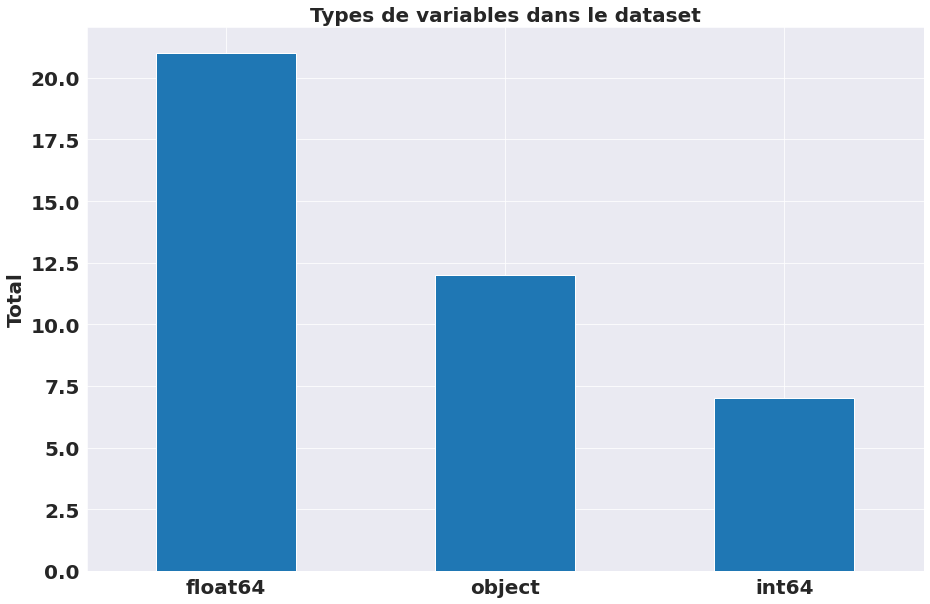

In [25]:
fig = plt.figure(figsize=(15,10))

b = df.dtypes.value_counts().plot.bar()
b.set_title("Types de variables dans le dataset", fontsize=20, weight='bold')
b.set_ylabel("Total", fontdict=font_style)
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.show()
fig.savefig('df_dtypes.png',bbox_inches='tight')

# <font color="#00afe6" id=section_2>2. Nettoyage du jeu de données final.</font>

# <font color="#00afe6" id=section_2_1> 2.1. Le type de batiment à étudier: Non-résidentiels.</font>

Dans ce projet, on cherchera à prédire les consommations et les émissions uniquement pour les bâtiments non destinés à l'habitation. 

Regardons les différents types de bâtiments répertoriés dans le jeu de données.

In [26]:
df.BuildingType.value_counts()

NonResidential          1488
Multifamily LR (1-4)    1040
Multifamily MR (5-9)     584
Multifamily HR (10+)     110
SPS-District K-12         99
Nonresidential COS        85
Campus                    25
Nonresidential WA          1
Name: BuildingType, dtype: int64

Il y a plusieurs types de bâtiments destinés à l'habitation qui sont renseignés via le label **Multifamiliy**. On va les renommer avec un label unique, et regarder la proportion qu'ils représentent dans le jeu de données.

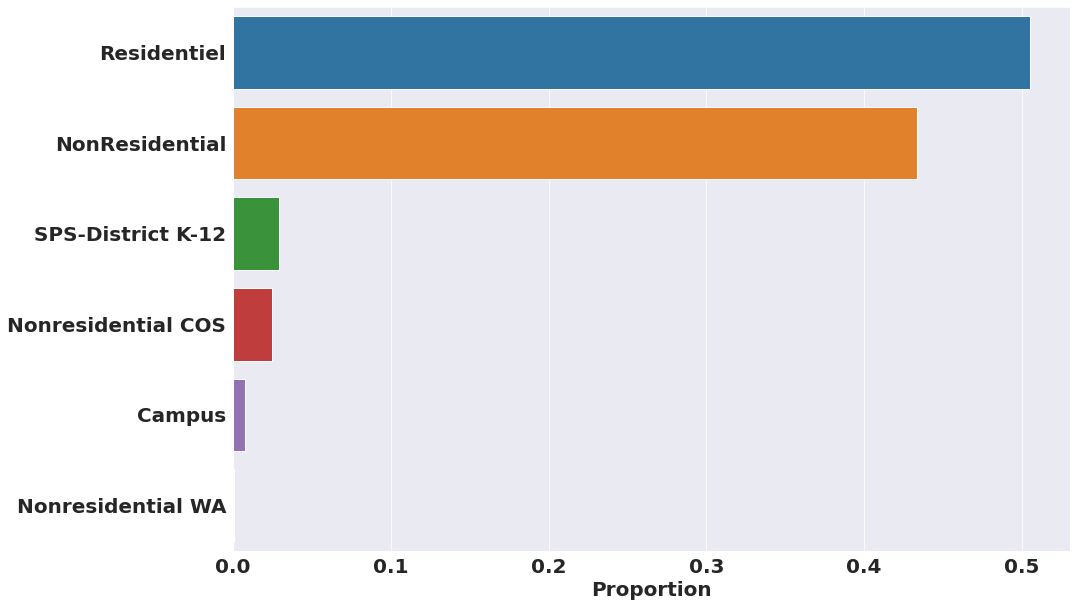

In [27]:
rn_building_type = {"BuildingType": {"Multifamily LR (1-4)": "Residentiel", 
                                     "Multifamily MR (5-9)": "Residentiel", 
                                     "Multifamily HR (10+)": "Residentiel"}}
df = df.replace(rn_building_type)

# Graphique
#
fig = plt.figure(figsize=(15,10))
s = sns.barplot(x = df.BuildingType.value_counts(normalize=True).values, 
                y = df.BuildingType.value_counts(normalize=True).index)
s.set_xlabel('Proportion', fontdict=font_style)
plt.show()

Nous allons donc réduire le dataset de moitié en supprimant les bâtiments de types résidentiels.

In [28]:
# DROPING
df = df[~(df['BuildingType']=='Residentiel')]

print("Le jeu de données compte à présent {} lignes et {} colonnes."\
       .format(df.shape[0],df.shape[1]))

Le jeu de données compte à présent 1698 lignes et 40 colonnes.


On peut voir ci-dessous qu'il reste des observations contenant le label **Multifamily** dans les autres variables catégorielles concernant les usages des bâtiments.

In [29]:
df[(df['PrimaryPropertyType'].str.contains("Multifamily")) | 
   (df['LargestPropertyUseType'].str.contains("Multifamily")) | 
   (df['SecondLargestPropertyUseType'].str.contains("Multifamily")) |
   (df['ListOfAllPropertyUseTypes'].str.contains("Multifamily"))]\
    .groupby(by=['BuildingType','PrimaryPropertyType','LargestPropertyUseType'])['ListOfAllPropertyUseTypes']\
.value_counts().to_frame()

ListOfAllPropertyUseTypes
BuildingType   PrimaryPropertyType         LargestPropertyUseType                ListOfAllPropertyUseTypes                                                    
Campus         Low-Rise Multifamily        Multifamily Housing                   Bar/Nightclub, Food Sales, Multifamily Housing,...                          1
               Mixed Use Property          Retail Store                          Food Sales, Multifamily Housing, Office, Other ...                          1
NonResidential Large Office                Office                                Data Center, Multifamily Housing, Office, Other...                          1
                                                                                 Multifamily Housing, Non-Refrigerated Warehouse...                          1
                                                                                 Multifamily Housing, Office, Parking, Retail Store                          1
               Low-Rise Multifamily        Multifamily Housing                   Bar/Nightclub, Multifamily Housing                                          1
                                                                                 Multifamily Housing                                                         1
               Mixed Use Property          Hotel                                 Hotel, Multifamily Housing, Parking, Retail Store                           1
                                           Multifamily Housing                   Financial Office, Multifamily Housing, Parking,...                          1
                                                                                 Hotel, Multifamily Housing, Parking                                         1
                                                                                 Multifamily Housing, Non-Refrigerated Warehouse...                          1
                                                                                 Multifamily Housing, Office, Other - Mall, Park...                          1
                                                                                 Multifamily Housing, Office, Other, Parking                                 1
                                                                                 Multifamily Housing, Other - Entertainment/Publ...                          1
                                                                                 Multifamily Housing, Parking, Retail Store                                  1
                                                                                 Multifamily Housing, Parking, Supermarket/Groce...                          1
                                                                                 Multifamily Housing, Retail Store, Social/Meeti...                          1
                                           Non-Refrigerated Warehouse            Multifamily Housing, Non-Refrigerated Warehouse...                          1
                                           Office                                Multifamily Housing, Office, Restaurant                                     2
                                                                                 Bank Branch, Multifamily Housing, Office, Other...                          1
                                                                                 Multifamily Housing, Office, Parking                                        1
                                                                                 Multifamily Housing, Office, Parking, Restaurant                            1
                                                                                 Multifamily Housing, Office, Parking, Retail Store                          1
                                           Parking                               Financial Office, Hotel, Multifamily Housing, O...                          1

Nous allons ici les supprimer.

In [30]:
# DROPING
df = df[~((df['PrimaryPropertyType'].str.contains("Multifamily")) | 
          (df['LargestPropertyUseType'].str.contains("Multifamily")) | 
          (df['SecondLargestPropertyUseType'].str.contains("Multifamily")) |
          (df['ListOfAllPropertyUseTypes'].str.contains("Multifamily")))]

print("Le jeu de données compte à présent {} lignes et {} colonnes."\
       .format(df.shape[0],df.shape[1]))

Le jeu de données compte à présent 1659 lignes et 40 colonnes.


De plus, on a observé qu'il n'y a qu'un seul bâtiment avec le label **Nonresidential WA** dans la variable `BuildingType`.

In [31]:
df[df['BuildingType']=='Nonresidential WA']

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Outlier,Latitude,Longitude
6699,50101,2016,Nonresidential WA,University,Burke Museum,1625049001,4,1962,1.0,1.0,68072,0,68072,College/University,College/University,68916.0,NaN,NaN,NaN,NaN,NaN,NaN,46.200001,46.200001,144.899994,144.899994,3180819.25,3180819.25,0.0,932244.6875,3180819.0,0.0,0.0,22.17,0.33,False,Compliant,NaN,47.66127,-122.31256


Il s'agit d'une université, que l'on va changer en Campus

In [32]:
df.at[df[df['BuildingType']=='Nonresidential WA'].index[0],'BuildingType'] = 'Campus'

Dans le système de l'**ESS**, la variable `BuildingType` nous informe sur la méthodologie appliquée pour l'attribution du score selon chaque propriété, voir [Référence Technique pour le calcul de l'ESS (page 10)](https://portfoliomanager.energystar.gov/pdf/reference/ENERGY%20STAR%20Score.pdf).

Par exemple, sont considérées comme "Campus" toutes les propriétés possédant plus d'un bâtiment. Ainsi, le **ESS** est attribué à la propriété pour l'ensemble de ses bâtiments, et non un **ESS** par bâtiment. 

Regardons cette distribution du nombre de bâtiments pour chaque type d'usage des propriétés.

In [33]:
df.groupby(by=['BuildingType','LargestPropertyUseType','PrimaryPropertyType'])['NumberofBuildings']\
.value_counts().to_frame()

NumberofBuildings
BuildingType       LargestPropertyUseType                             PrimaryPropertyType         NumberofBuildings                   
Campus             Adult Education                                    Other                       5.0                                1
                   College/University                                 University                  1.0                                2
                                                                                                  4.0                                1
                                                                                                  11.0                               1
                                                                                                  14.0                               1
                                                                                                  27.0                               1
                                                                                                  111.0                              1
                   K-12 School                                        K-12 School                 1.0                                3
                                                                                                  5.0                                1
                   Manufacturing/Industrial Plant                     Other                       3.0                                1
                   Office                                             Large Office                14.0                               1
                                                                      Mixed Use Property          1.0                                1
                   Other                                              Other                       1.0                                1
                                                                                                  4.0                                1
                                                                                                  5.0                                1
                                                                                                  7.0                                1
                                                                                                  10.0                               1
                                                                                                  23.0                               1
                   Parking                                            Mixed Use Property          3.0                                1
                   Restaurant                                         Restaurant                  1.0                                1
                   Retail Store                                       Mixed Use Property          1.0                                1
NonResidential     Adult Education                                    Other                       1.0                                1
                   Automobile Dealership                              Other                       1.0                                6
                   Bank Branch                                        Mixed Use Property          1.0                                1
                                                                      Other                       1.0                                3
                   College/University                                 University                  1.0                               15
                                                                                                  2.0                                2
                   Convention Center                                  Other                       1.0                                1
                   Courthouse                                      

Bien qu'il existe quelques irrégularités dans le jeu de données, on peut voir qu'il y a une ligne très atypique pour la variable `NumberofBuildings` avec 111 bâtiments. Nous allons la supprimer pour ne pas perturber notre modélisation pour le système de prédiction.

In [34]:
# DROPING
df = df.drop(df[df['NumberofBuildings']==111].index)

    Ci-dessous la répartition actuelle des types de bâtiments dans notre jeu de données final.

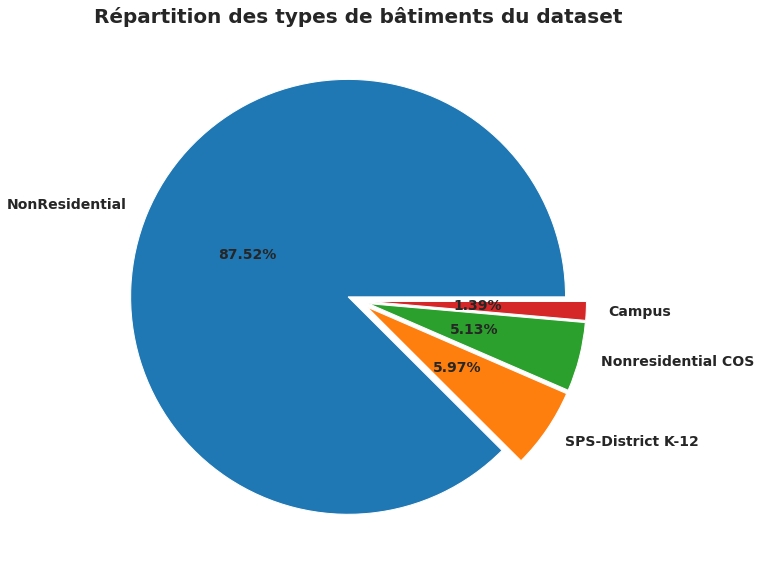

In [35]:
colors = sns.color_palette('pastel')# [0:5]
n_expl = len(df.BuildingType.value_counts().index)
fig = plt.figure(figsize=(15,10))
plt.pie(df.BuildingType.value_counts(), 
         labels      = df.BuildingType.value_counts().index,
         textprops   = {'fontsize': 14, 'weight': 'bold',},
         autopct     = "%.2f%%",
         explode     = [0.05]*n_expl,
         pctdistance = 0.5)
plt.title("Répartition des types de bâtiments du dataset", fontdict=font_style)
plt.show()
# fig.savefig('BuildingType_final.png',bbox_inches='tight')

# <font color="#00afe6" id=section_2_2> 2.2. Élimination des variables inutiles.</font>

### Colonnes vides

Ci-dessous le taux de remplissage des variables.

In [36]:
# Taux de Vide

colonne_vide(df)

,Nom_Colonne,Taux_de_Vide
0,OSEBuildingID,0.00
1,ComplianceStatus,0.00
2,DefaultData,0.00
3,Latitude,0.00
4,PropertyGFABuilding(s),0.00
5,PropertyGFAParking,0.00
6,PropertyGFATotal,0.00
7,NumberofFloors,0.00
8,Longitude,0.00
9,YearBuilt,0.00


In [37]:
# Comme précédemment, on supprime les colonnes vides à plus de 90%

pos_col_vide = np.where(colonne_vide(df).Taux_de_Vide > 90)
nom_col_vide = list(colonne_vide(df).Nom_Colonne.loc[pos_col_vide])

# On les supprime 
# DROPING
df.drop(nom_col_vide, axis=1, inplace=True)

print("Le jeu de données compte à présent {} lignes et {} colonnes."\
       .format(df.shape[0],df.shape[1]))

Le jeu de données compte à présent 1658 lignes et 38 colonnes.


### Colonnes redondantes concernant les `informations générales des bâtiments`.

In [38]:
# DROPING
df.drop(['PropertyName',
         'TaxParcelIdentificationNumber',
         'DefaultData',
         'ComplianceStatus'], axis=1, inplace=True)

print("Le jeu de données compte à présent {} lignes et {} colonnes."\
       .format(df.shape[0],df.shape[1]))

Le jeu de données compte à présent 1658 lignes et 34 colonnes.


Les variables `YearBuilt` (année de construction du bâtiment) et `DataYear` (année du relevé) permettent de calculer l'âge du batiment. Nous allons pour cela créer une nouvelle variable `BuildingAge`.

In [39]:
# Création d'une colonne pour avoir l'âge du bâtiment

df['BuildingAge'] = df['DataYear'] - df['YearBuilt']

# On supprime les deux variables précédentes
# DROPING
df.drop(['DataYear','YearBuilt'], axis=1, inplace=True)

### Colonnes à éliminier concernant la `consommation énergétique des bâtiments`.

Dans le but de prédire les consommations et les émissions des bâtiments pour lesquels les relevés n'ont pas encore été mesurés, nous devons nous passer des variables provenant de ces relevés. Ainsi, la problématique des fuites de données sera évitée. Ci dessous, les variables en question que l'on doit supprimer.

In [68]:
# Data Leakage
df.drop(['SiteEUI(kBtu/sf)',
         'SourceEUI(kBtu/sf)',
         'SteamUse(kBtu)',
         'Electricity(kBtu)',
         'GHGEmissionsIntensity',
         'NaturalGas(kBtu)',
         'SiteEUIWN(kBtu/sf)', 
         'SourceEUIWN(kBtu/sf)', 
         'SiteEnergyUseWN(kBtu)',
         'Electricity(kWh)',
         'NaturalGas(therms)'], axis=1, inplace=True)

print("Le jeu de données compte à présent {} lignes et {} colonnes."\
       .format(df.shape[0],df.shape[1]))

### Colonnes inutiles concernant les `usages/superficies des bâtiments`.

Les paires de variables           
    (`SecondLargestPropertyUseType`,`SecondLargestPropertyUseTypeGFA`)        
    et                   
    (`ThirdLargestPropertyUseType`,`ThirdLargestPropertyUseTypeGFA`)                   
décrivant les second et troisième types d'usages avec leurs superficies correspondantes ont un taux de remplissage à moins de 50%.

In [41]:
usetype_del = ['SecondLargestPropertyUseType',
               'SecondLargestPropertyUseTypeGFA',
               'ThirdLargestPropertyUseType',
               'ThirdLargestPropertyUseTypeGFA'
              ]

colonne_vide(df[usetype_del])

,Nom_Colonne,Taux_de_Vide
0,SecondLargestPropertyUseType,50.06
1,SecondLargestPropertyUseTypeGFA,50.06
2,ThirdLargestPropertyUseType,80.58
3,ThirdLargestPropertyUseTypeGFA,80.58


Comme il n'est pas possible d'imputer les valeurs manquantes sans commettre de grossières erreurs, nous allons simplement les retirer de notre jeu de données.

In [42]:
# DROPING
df.drop(usetype_del, axis=1, inplace=True)

print("Le jeu de données compte à présent {} lignes et {} colonnes."\
       .format(df.shape[0],df.shape[1]))

Le jeu de données compte à présent 1658 lignes et 24 colonnes.


In [43]:
df.dtypes

OSEBuildingID                  int64
BuildingType                  object
PrimaryPropertyType           object
CouncilDistrictCode            int64
NumberofBuildings            float64
NumberofFloors               float64
PropertyGFATotal               int64
PropertyGFAParking             int64
PropertyGFABuilding(s)         int64
ListOfAllPropertyUseTypes     object
LargestPropertyUseType        object
LargestPropertyUseTypeGFA    float64
ENERGYSTARScore              float64
SiteEUI(kBtu/sf)             float64
SourceEUI(kBtu/sf)           float64
SiteEnergyUse(kBtu)          float64
SteamUse(kBtu)               float64
Electricity(kBtu)            float64
NaturalGas(kBtu)             float64
TotalGHGEmissions            float64
GHGEmissionsIntensity        float64
Latitude                     float64
Longitude                    float64
BuildingAge                    int64
dtype: object

# <font color="#00afe6" id=section_3> 3. Feature engineering.</font>

# <font color="#00afe6" id=section_3_1> 3.1. Cardinal des variables catégorielles pour le type d'usage.</font>

Les variables catégorielles décrivant les usages des bâtiments sont :       
    `BuildingType`      
    `PrimaryPropertyType`         
    `LargestPropertyUseType`             
    `ListOfAllPropertyUseTypes`        

In [44]:
# Les variables catégorielles d'intérêt sont : 
var_categ = ['BuildingType',
             'PrimaryPropertyType',
             'LargestPropertyUseType',
             'ListOfAllPropertyUseTypes'
            ]

# On regarde leur taux de vide

colonne_vide(df[var_categ])

,Nom_Colonne,Taux_de_Vide
0,BuildingType,0.00
1,PrimaryPropertyType,0.00
2,ListOfAllPropertyUseTypes,0.48
3,LargestPropertyUseType,0.72


Regardons à présent le nombre de valeurs uniques pour les variables retenues, c'est-à-dire le cardinal.

In [45]:
df[var_categ].nunique().to_frame().rename(columns={0:'Cardinal'})

,Cardinal
BuildingType,4
PrimaryPropertyType,23
LargestPropertyUseType,56
ListOfAllPropertyUseTypes,344


Excepté , le cardinal des autres variables est élevé. 

Dans cette section, nous allons créer une nouvelle variable pour "détailler" les catégories présentes dans la variable `BuildingType` en nous aidant de la [classification de la ville de Seattle](https://www.seattle.gov/documents/Departments/SDCI/Codes/SeattleBuildingCode/2015SBCChapter3.pdf). Le but étant d'avoir une variable avec un cardinal comparable aux variables `LargestPropertyUseType` et `PrimaryPropertyType`.

Dans un second temps, grâce à la colonne `ListOfAllPropertyUseTypes`, on va créer une variable (numérique cette fois) pour compter le nombre de type d'usage par bâtiment. Nous allons alors la retirer de notre analyse car son cardinal est très elevé.

In [46]:
# Commençons par regarder la variable qui est remplie à 100%

df['PrimaryPropertyType'].value_counts().to_frame()

,PrimaryPropertyType
Small- and Mid-Sized Office,291
Other,256
Warehouse,187
Large Office,173
K-12 School,141
Retail Store,94
Mixed Use Property,91
Hotel,76
Worship Facility,72
Distribution Center,53


In [47]:
# Formatage des entrées de la variable
#
df['PrimaryPropertyType'] = df['PrimaryPropertyType'].str.replace('\n','')

Remplissage de `LargestPropertyUseType` à l'aide de `PrimaryPropertyType`.

In [48]:
df.loc[df['LargestPropertyUseType'].isnull(),'LargestPropertyUseType'] = df['PrimaryPropertyType']

Dictionnaire pour la création de la nouvelle variable catégorielle `NewPropertyUseTypes`.

In [49]:
# On initialise à l'aide de la variable 'LargestPropertyUseType'
#
df['NewPropertyUseTypes'] = df['LargestPropertyUseType']

LargestUsage_dict = {
              # Type : Assembly
              'Worship Facility' : 'Assembly',
              'Other - Recreation': 'Assembly',
              'Other - Entertainment/Public Assembly': 'Assembly',
              'Senior Care Community': 'Assembly',
              'Restaurant': 'Assembly',
              'Social/Meeting Hall': 'Assembly',
              'Library': 'Assembly',
              'Museum': 'Assembly',
              'Performing Arts': 'Assembly',
              'Other - Restaurant/Bar': 'Assembly',
              'Movie Theater': 'Assembly',
              'Other - Education' :  'Assembly',
              'Adult Education' : 'Assembly',  
            
              # Type : Office
              'Small- and Mid-Sized Office' : 'Office', 
              'Office' :  'Office',  
              'Other - Services' : 'Office',
              'Financial Office' : 'Office', 
              'Bank Branch' : 'Office',  
    
              # Type : Business
              'Medical Office' : 'Business',
              'Laboratory' : 'Business', 
              'Fitness Center/Health Club/Gym' : 'Business', 
              'Other/Specialty Hospital' : 'Business', 
              'Lifestyle Center' : 'Business', 
              'Personal Services (Health/Beauty, Dry Cleaning, etc)' : 'Business', 
              'Residential Care Facility' : 'Business', 
              'Outpatient Rehabilitation/Physical Therapy' : 'Business', 
              'Food Service' : 'Business', 
              
              # Type : Factory
              'Non-Refrigerated Warehouse' : 'Factory', 
              'Distribution Center' : 'Factory', 
              'Refrigerated Warehouse' : 'Factory', 
              'Manufacturing/Industrial Plant' : 'Factory', 
              'Data Center' : 'Factory', 
              'Self-Storage Facility' : 'Factory', 
              
              # Type : Institutional
              'Prison/Incarceration' : 'Institutional', 
              'Pre-school/Daycare': 'Institutional', 
              'Other - Public Services': 'Institutional', 
              'Courthouse': 'Institutional', 
              'Convention Center': 'Institutional', 
              'Fire Station': 'Institutional', 
              'Police Station': 'Institutional',               
              
              # Type : Hospital
              'Urgent Care/Clinic/Other Outpatient' : 'Campus', 
              'Hospital (General Medical & Surgical)' : 'Campus',
              
              # Type : University
              'College/University' :'Campus',  
              
              # Type : Education
              'K-12 School' : 'K-12 School', 

              # Type : Hotel
              'Hotel' : 'Hotel', 
              'Other - Lodging/Residential': 'Hotel', 
              'Residence Hall/Dormitory' : 'Hotel', 
             
              
              # Type : Mercantile
              'Retail Store' : 'Mercantile', 
              'Strip Mall': 'Mercantile', 
              'Supermarket/Grocery Store': 'Mercantile', 
              'Repair Services (Vehicle, Shoe, Locksmith, etc)': 'Mercantile', 
              'Automobile Dealership': 'Mercantile', 
              'Other - Mall': 'Mercantile', 
              'Other - Utility': 'Mercantile', 
              'Wholesale Club/Supercenter': 'Mercantile', 
              'Supermarket / Grocery Store' : 'Mercantile',

              # Type : Mixed Use Property
              'Other' : 'Mixed Use Property',
    
              # Type : Parking
              'Parking' : 'Parking' 
    
             }


df['NewPropertyUseTypes'] = df['NewPropertyUseTypes'].replace(LargestUsage_dict)


df['NewPropertyUseTypes'].value_counts().to_frame()

,NewPropertyUseTypes
Office,505
Factory,305
Assembly,189
Mercantile,164
K-12 School,141
Mixed Use Property,104
Hotel,102
Business,72
Campus,37
Parking,28


On va utiliser la fonction ci-dessous pour créer la variable numérique `TotalUseTypeCount` pour compter le nombre de type d'usages pour chaque bâtiment à l'aide de la colonne `ListOfAllPropertyUseTypes`.

In [50]:
def split_words(df, column = None):
    list_words = set()
    for word in df[column].str.split(','):
        if isinstance(word, float):
            continue
        list_words = set().union(word, list_words)
    return list(list_words)

In [51]:
df['TotalUseTypeCount'] = [str(word).count(",") + 1 for word in df['ListOfAllPropertyUseTypes'].str.split(',')]
df['TotalUseTypeCount'].value_counts()

1     829
2     503
3     198
4      67
5      36
6      18
9       2
7       2
11      1
13      1
8       1
Name: TotalUseTypeCount, dtype: int64

On peut maintenant supprimer les variables `BuildingType` et `ListOfAllPropertyUseTypes` car redondantes.

In [52]:
# DROPING
df.drop(['BuildingType','ListOfAllPropertyUseTypes'], axis=1, inplace=True)

# <font color="#00afe6" id=section_3_2> 3.2. Clustering des positions géographiques.</font>

Ci-dessous une liste qui regroupe les variables décrivant les positions géographiques des bâtiments:

In [53]:
var_posgeo = ['CouncilDistrictCode', 
              'Latitude', 
              'Longitude'
             ]

In [54]:
# On peut voir que ces colonnes sont remplies à 100%
#
colonne_vide(df[var_posgeo])

,Nom_Colonne,Taux_de_Vide
0,CouncilDistrictCode,0.0
1,Latitude,0.0
2,Longitude,0.0


Nous allons maintenant créer une nouvelle variable via clustering ``KMeans`` des variables `Longitude`, `Latitude` et `CouncilDistrictCode`.

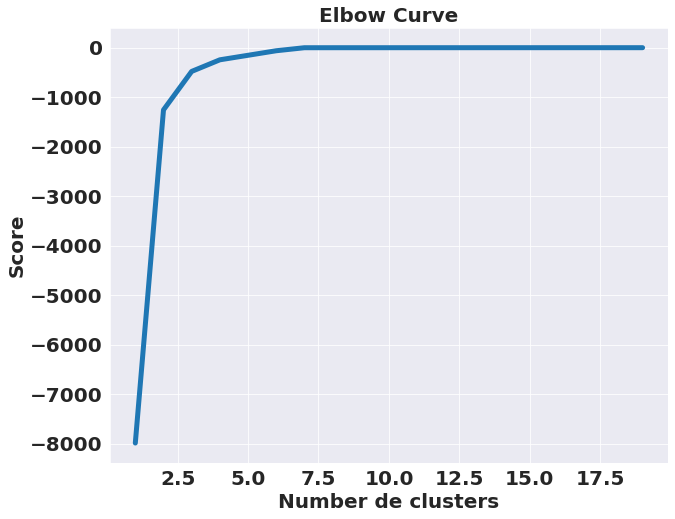

In [55]:
from sklearn.cluster import KMeans

K_clusters = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]

# Variable avec Longitude, Latitude et CouncilDistrictCode
geoPos=df.loc[:,['CouncilDistrictCode','Latitude','Longitude']]

score = [kmeans[i].fit(geoPos).score(geoPos) for i in range(len(kmeans))]

# Visualize
fig = plt.figure(figsize=(10,8))
plt.plot(K_clusters, score, linewidth=5)
plt.xlabel('Number de clusters', fontdict=font_style)
plt.ylabel('Score', fontdict=font_style)
plt.title('Elbow Curve', fontdict=font_style)
plt.show()

Bien qu'un nombre de 7 clusters paraît suffisant d'après la courbe en coude ci-dessus, nous en choisirons 15 pour mieux distinguer les zones denses.

In [56]:
# Nombre de cluster
nbClus = 15

# Calcul du clustering k-means 

kmeans = KMeans(n_clusters = nbClus, init ='random')
kmeans.fit(geoPos[geoPos.columns[0:3]]) 

# fit_predict
geoPos['cluster_label'] = kmeans.fit_predict(geoPos[geoPos.columns[1:3]])

# Coordonnées des centres des clusters.
centers = kmeans.cluster_centers_ 

# Labels
labels  = kmeans.predict(geoPos[geoPos.columns[1:3]]) 

df['cluster_label'] = geoPos['cluster_label']

Sur la projection ci-dessous, on montre le résultat du clustering comparé à la découpe administrative que représente la variable `CouncilDistrictCode`.

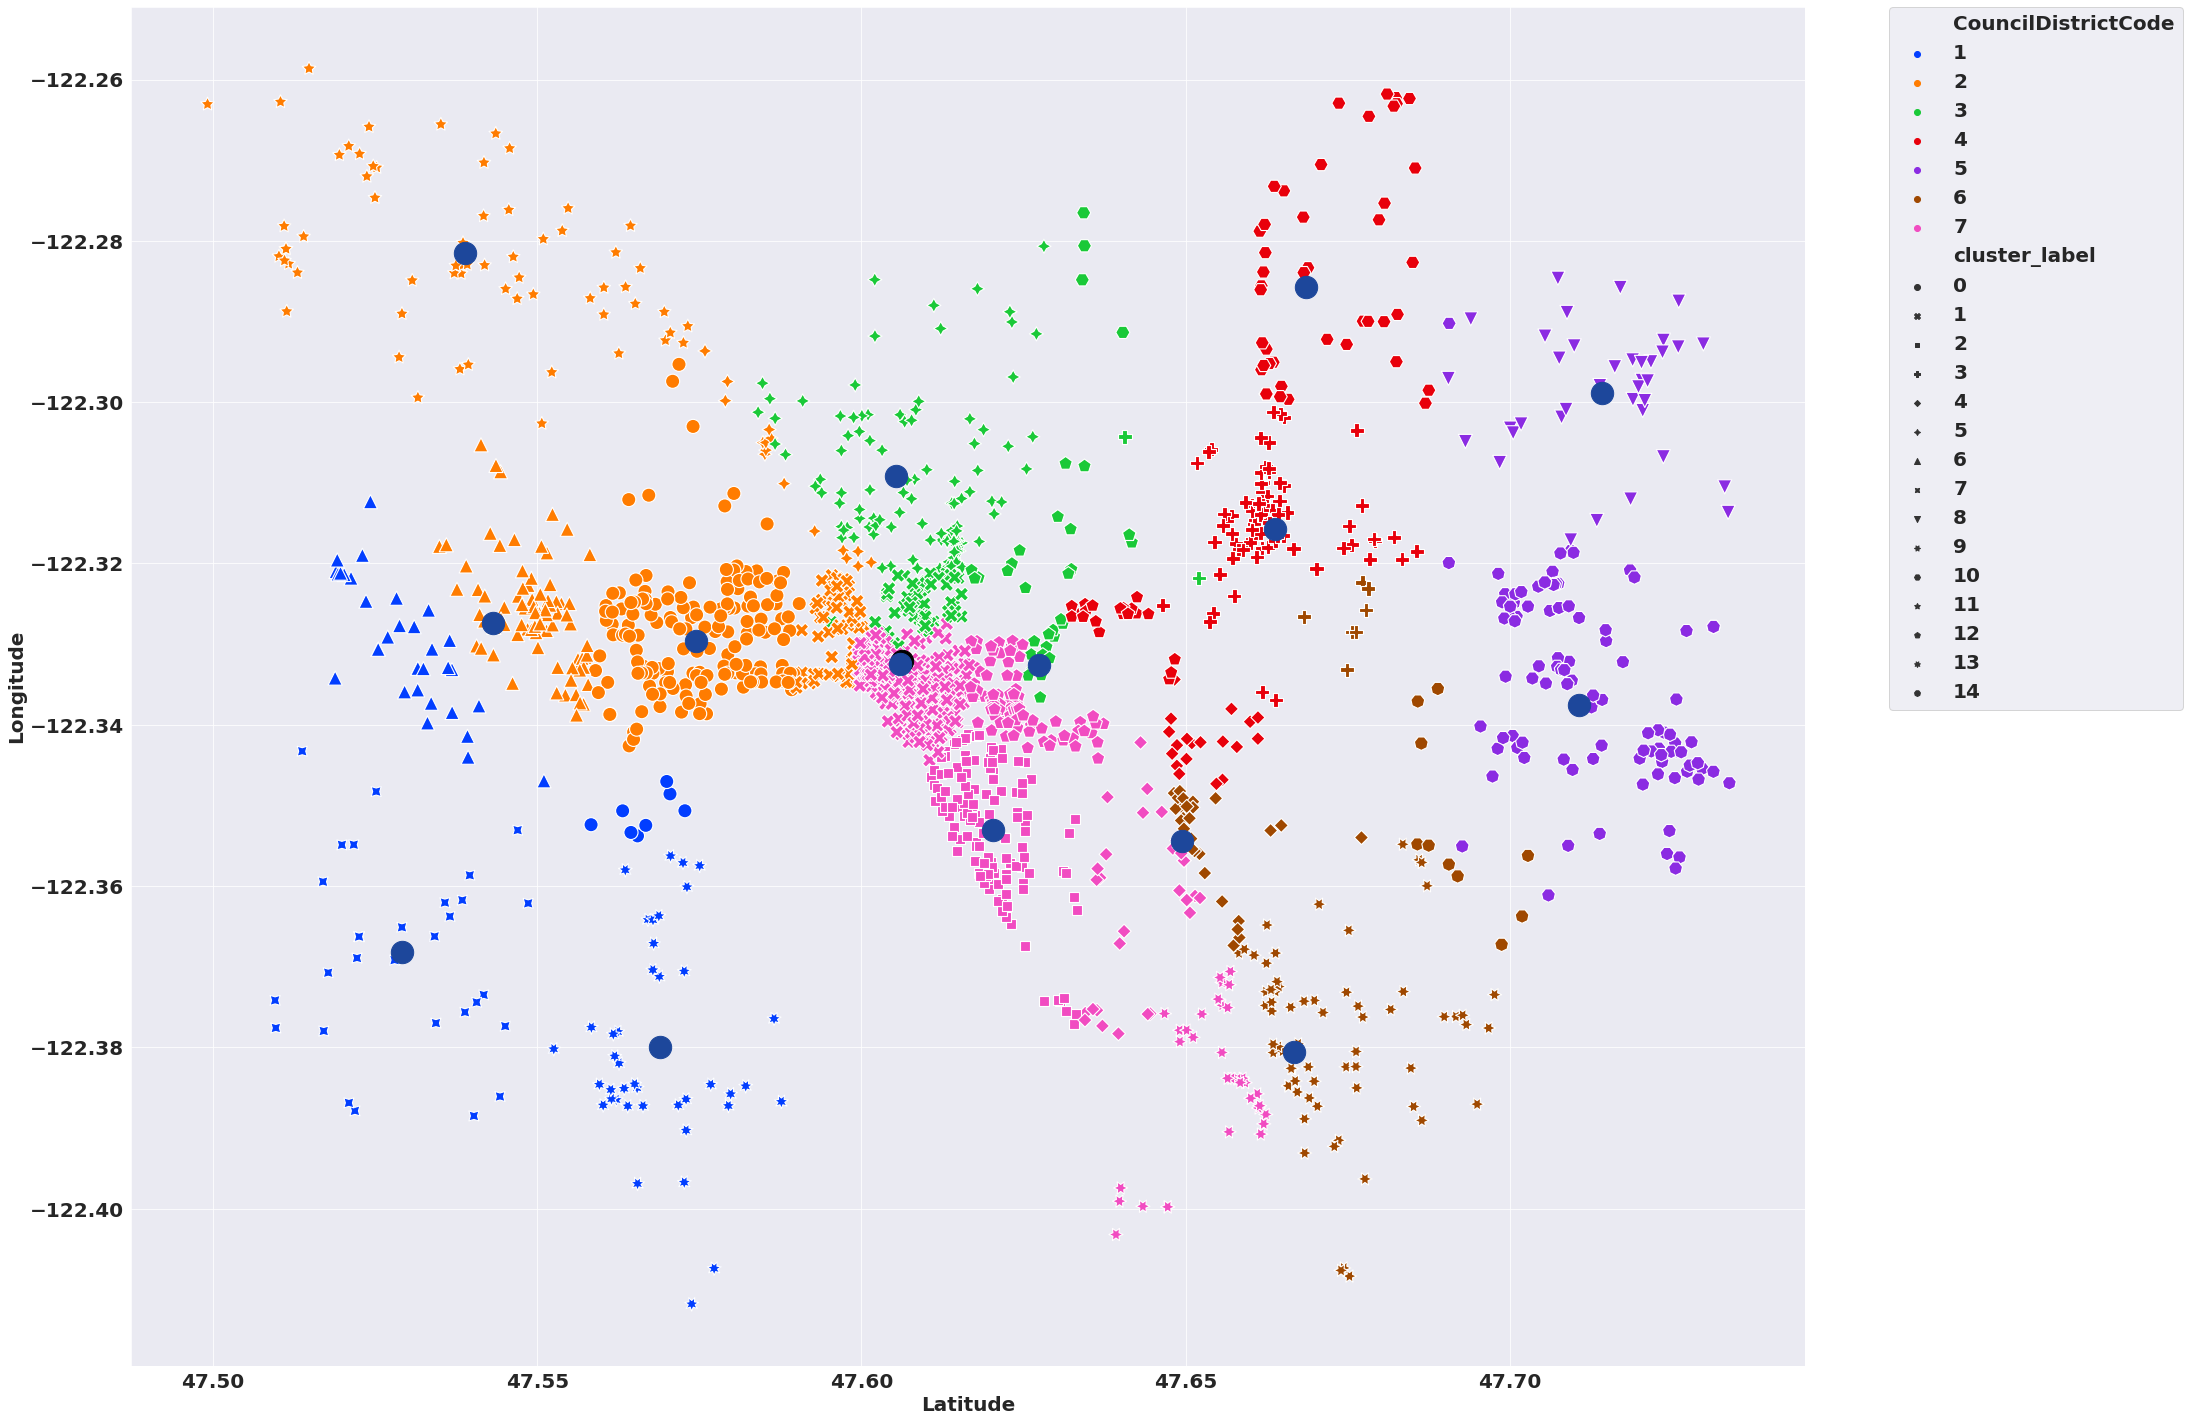

In [57]:
fig = plt.figure(figsize=(30,25))
c = sns.scatterplot(data=geoPos, 
                    x="Latitude", 
                    y="Longitude", 
                    hue="CouncilDistrictCode",
                    style='cluster_label',
                    palette = "bright", 
                    s=200)
c.set_xlabel(c.get_xlabel(), fontsize=20, weight='bold')
c.set_ylabel(c.get_ylabel(), fontsize=20, weight='bold')
#Coordonnées du centre de Seattle en noir sur la carte
plt.scatter(47.6062, -122.3321, s=500, c='k')
# Coordonnées des centres des clusters
plt.scatter(centers[:, 0], centers[:, 1], s=500, c='#1d479b')
c.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
# fig.savefig('cluster_label.png', bbox_inches='tight')

On peut maintenant supprimer les variables précédemment clustérisées car redondantes.

In [58]:
# DROPING 
df.drop(var_posgeo, axis=1, inplace=True)

In [59]:
df.isnull().sum()

OSEBuildingID                  0
PrimaryPropertyType            0
NumberofBuildings              2
NumberofFloors                 0
PropertyGFATotal               0
PropertyGFAParking             0
PropertyGFABuilding(s)         0
LargestPropertyUseType         0
LargestPropertyUseTypeGFA     12
ENERGYSTARScore              557
SiteEUI(kBtu/sf)               4
SourceEUI(kBtu/sf)             3
SiteEnergyUse(kBtu)            3
SteamUse(kBtu)                 3
Electricity(kBtu)              3
NaturalGas(kBtu)               3
TotalGHGEmissions              3
GHGEmissionsIntensity          3
BuildingAge                    0
NewPropertyUseTypes            0
TotalUseTypeCount              0
cluster_label                  0
dtype: int64

# <font color="#00afe6" id=section_3_3> 3.3. Ratios entre variables quantitatives.</font>

Comme précédemment, nous allons nous baser sur la variable répertoriant les principales utilisations des bâtiments. Pour les variables quantitatives, il est donc question de la variable `LargestPropertyUseTypeGFA`.
On pourra alors mieux se représenter le comportement des principaux usagers de chaque propriété selon la superficie dédiée.

Cependant, nous devons faire attention à ne pas créer de variables corrélées et colinéaires qui pourraient mesurer une même information. Dans tout le dataset, on a une première relation linéaire :              
```PropertyGFATotal = PropertyGFABuilding(s) + PropertyGFAParking``` 

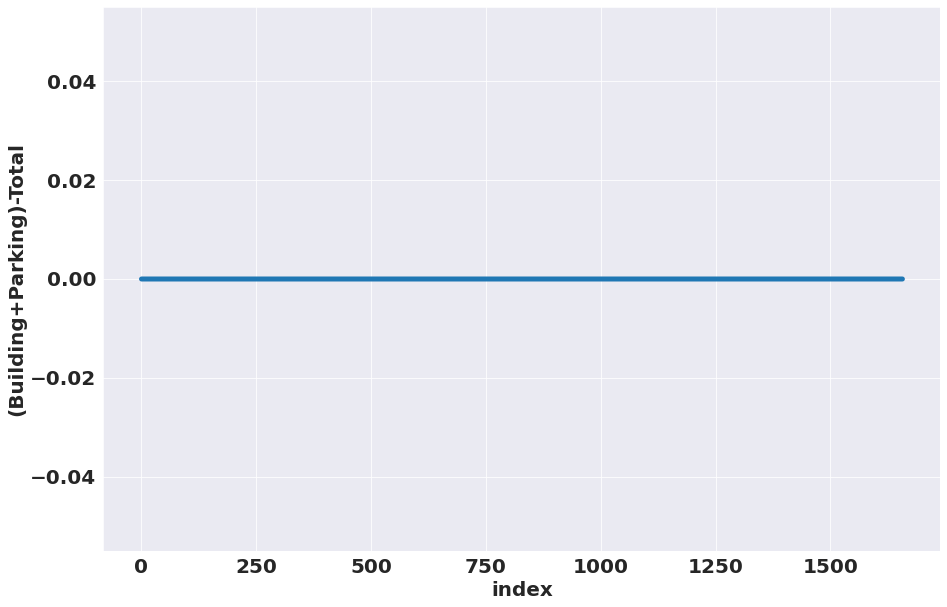

In [60]:
# On change le dtypes de ces variables de Int64 à float64

df['PropertyGFATotal'] = df['PropertyGFATotal'].astype('float64')
df['PropertyGFAParking'] = df['PropertyGFAParking'].astype('float64')
df['PropertyGFABuilding(s)'] = df['PropertyGFABuilding(s)'].astype('float64')

# On actualise les indices dataframe
df = df.reset_index(drop=True)


fig = plt.figure(figsize=(15,10))
df['PropertyGFABuilding(s)'].add(df['PropertyGFAParking']).sub(df['PropertyGFATotal']).plot(linewidth=5)
plt.xlabel('index', fontdict=font_style)
plt.ylabel('(Building+Parking)-Total', fontdict=font_style)
plt.show()
# fig.savefig('Total_Building_Parking.png')

Tout d'abord, on doit procéder à l'imputation des valeurs manquante de la variables `LargestPropertyUseTypeGFA`. Regardons les en détails car leur nombre n'est pas grand (12 valeurs manquantes seulement).

In [61]:
# Fonction pour montrer en couleur les cellules négatives dans un dataframe donné
def style_negative(v, props=''):
    if isinstance(v,float):
        return props if v < 0 else None
    
# Idem les cellules contenant des NaN
def style_nan(v, props=''):
    if isinstance(v,float):
        return props if np.isnan(v) else None

In [62]:
df[df['LargestPropertyUseTypeGFA'].isnull()==True][['PropertyGFATotal',
                                                    'PropertyGFABuilding(s)',
                                                    'PropertyGFAParking',
                                                    'LargestPropertyUseTypeGFA']].\
style.applymap(style_nan, props='color:red;')

,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,LargestPropertyUseTypeGFA
0,111077.000000,111077.000000,0.000000,nan
5,66968.000000,66968.000000,0.000000,nan
8,54171.000000,54171.000000,0.000000,nan
17,22029.000000,22029.000000,0.000000,nan
23,23000.000000,23000.000000,0.000000,nan
26,21600.000000,21600.000000,0.000000,nan
374,111445.000000,111445.000000,0.000000,nan
589,63150.000000,63150.000000,0.000000,nan
837,61721.000000,61721.000000,0.000000,nan
1354,48350.000000,48350.000000,0.000000,nan


Étant donnée que les surfaces des parkings sont nulles, il parrait judicieux d'imputer ces entrées à l'aide de la variable `PropertyGFABuilding(s)`.

In [63]:
df.loc[df['LargestPropertyUseTypeGFA'].isnull(),'LargestPropertyUseTypeGFA'] = df['PropertyGFABuilding(s)']

Ci-dessous, on crée les nouvelles variables ratios de ces trois variables avec la variable `LargestPropertyUseTypeGFA`. Ces nouvelles variables expriment donc le pourcentage de chaque propriété consacré à son utilisation principale.

In [64]:
df['GFALargestRateProp'] = df['LargestPropertyUseTypeGFA'].div(df['PropertyGFATotal'])

# On inverse le ratio pour éviter des éventuelles divisions par zéro

df['GFALargestRateBuild'] = df['PropertyGFABuilding(s)'].div(df['LargestPropertyUseTypeGFA'])

df['GFALargestRatePark'] = df['PropertyGFAParking'].div(df['LargestPropertyUseTypeGFA'])

Enfin, grâce aux variables `TotalUseTypeCount`, `NumberofBuildings` et `NumberofFloors` on peut définir une dernière série de variables ratios pour une meilleure représentation du comportement des usagers occupant chaque propriété.

In [65]:
# Remplissage des valeurs nulles
df['NumberofBuildings'].replace(0, 1, inplace=True)
df['NumberofFloors'].replace(0, 1, inplace=True)

In [66]:
df['GFAUseCountRateLargest'] = df['LargestPropertyUseTypeGFA'].div(df['TotalUseTypeCount'])

df['GFAnbBuildingRateLargest'] = df['LargestPropertyUseTypeGFA'].div(df['NumberofBuildings'])

df['GFAFloorRateLargest'] = df['LargestPropertyUseTypeGFA'].div(df['NumberofFloors'])

## Elimination des variables inutiles

Avec le *feature engineering* que l'on vient de réaliser, on va supprimer les variables ci-dessous car elles deviennent désormais redondantes. 

Pour représenter la superficie, nous gardons uniquement `PropertyGFATotal` qui donne une information plus globale sur les proriétés.

In [67]:
# On peut maintenant supprimer ces anciennes features
# DROPING
df.drop(['PropertyGFAParking',
         'PropertyGFABuilding(s)',
         'LargestPropertyUseTypeGFA',
         #
         'TotalUseTypeCount',
         'NumberofBuildings',
         'NumberofFloors'], axis=1, inplace=True)

## Elimination des observations aberrantes

In [69]:
print("Avant élimination, le jeu de données compte à présent {} lignes et {} colonnes."\
       .format(df.shape[0],df.shape[1]))

Avant élimination, le jeu de données compte à présent 1658 lignes et 16 colonnes.


In [70]:
# Rapide description statistique des variables numériques du dataset réduit

df.describe().style.applymap(style_negative, props='color:red;')

,OSEBuildingID,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,BuildingAge,cluster_label,GFALargestRateProp,GFALargestRateBuild,GFALargestRatePark,GFAUseCountRateLargest,GFAnbBuildingRateLargest,GFAFloorRateLargest
count,1658.000000,1658.000000,1101.000000,1655.000000,1655.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1656.000000,1658.000000
mean,16222.796140,112199.991556,65.524069,8007878.747854,182.176097,54.123040,5.341375,0.879676,1.159183,0.096647,59857.670881,87501.274691,31890.545251
std,13774.671718,191696.982938,28.428261,21940920.000717,714.918347,32.478366,4.627121,0.300745,0.423322,0.255418,95011.407222,147002.635795,50699.896376
min,1.000000,11285.000000,1.000000,0.000000,-0.800000,1.000000,0.000000,0.186469,0.101000,0.000000,806.875000,4633.200000,221.696970
25%,578.250000,29109.500000,49.000000,1216332.687500,19.870000,27.000000,1.000000,0.711695,1.000000,0.000000,17351.125000,25000.000000,11182.333333
50%,21139.000000,48988.500000,73.000000,2547582.000000,49.530000,51.000000,4.000000,0.982942,1.000000,0.000000,31348.500000,42780.000000,19693.166667
75%,24586.500000,104074.250000,89.000000,6851194.250000,142.155000,86.000000,9.000000,1.000000,1.200187,0.000000,62993.750000,87558.000000,32407.916667
max,50226.000000,2200000.000000,100.000000,448385312.000000,16870.980000,116.000000,14.000000,6.426849,5.362820,4.020619,1172127.000000,1719643.000000,859821.500000


On considère les entrées négatives des variables `Electricity(kBtu)`, `TotalGHGEmissions` et `GHGEmissionsIntensity` comme étant des observations aberrantes. Nous les supprimons donc pour ne pas perturber notre modélisation statistique.

In [71]:
# On peut voir qu'il s'agit en fait d'une seule et même ligne

df[(df['TotalGHGEmissions'] <0)].style.applymap(style_negative, props='color:red;')

,OSEBuildingID,PrimaryPropertyType,PropertyGFATotal,LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,BuildingAge,NewPropertyUseTypes,cluster_label,GFALargestRateProp,GFALargestRateBuild,GFALargestRatePark,GFAUseCountRateLargest,GFAnbBuildingRateLargest,GFAFloorRateLargest
1597,49784,Small- and Mid-Sized Office,52000.000000,Office,100.000000,342726.093800,-0.800000,3,Office,5,0.926135,1.079757,0.000000,48159.000000,48159.000000,8026.500000


In [72]:
# On élimine cette ligne
# DROPING
df = df[~((df['TotalGHGEmissions'] <0)) ]

df.shape

(1657, 16)

On observe également certaines lignes avec consommations et/ou émissions nulles que l'on ne doit pas supprimer car elles peuvent s'interpréter comme valeurs très faibles. En effet, il est possible que certaines propriétés (il s'agit surtout d'écoles primaires) produisent de l'électricité *in-situ* via un système d'énergie verte (solaire, éolienne etc..). Dans ce cas, elles réduisent significativement leurs émissions ainsi que leur alimentation en électricité via énergie fossile. Ces écoles sont généralement très bien notées selon le système **ESS**.

In [73]:
df[(df['SiteEnergyUse(kBtu)']==0) | 
   (df['TotalGHGEmissions']==0)]

,OSEBuildingID,PrimaryPropertyType,PropertyGFATotal,LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,BuildingAge,NewPropertyUseTypes,cluster_label,GFALargestRateProp,GFALargestRateBuild,GFALargestRatePark,GFAUseCountRateLargest,GFAnbBuildingRateLargest,GFAFloorRateLargest
57,34,K-12 School,126351.0,K-12 School,NaN,0.0,0.00,61,K-12 School,5,1.000000,1.000000,0.0,126351.0,126351.0,126351.000000
60,37,K-12 School,51582.0,K-12 School,NaN,0.0,10.43,27,K-12 School,2,1.069482,0.935032,0.0,55166.0,55166.0,27583.000000
90,87,K-12 School,53352.0,K-12 School,NaN,0.0,4.19,68,K-12 School,7,1.228970,0.813690,0.0,65568.0,65568.0,32784.000000
109,118,K-12 School,74468.0,K-12 School,NaN,0.0,11.84,17,K-12 School,13,1.012032,0.988111,0.0,75364.0,75364.0,25121.333333
113,122,K-12 School,58933.0,K-12 School,NaN,0.0,16.36,25,K-12 School,11,1.030407,0.970490,0.0,60725.0,60725.0,30362.500000
123,140,K-12 School,66588.0,K-12 School,NaN,0.0,14.67,25,K-12 School,4,1.000000,1.000000,0.0,66588.0,66588.0,22196.000000
161,217,K-12 School,160270.0,K-12 School,NaN,0.0,229.38,57,K-12 School,9,1.000000,1.000000,0.0,160270.0,160270.0,160270.000000
167,227,K-12 School,136188.0,K-12 School,NaN,0.0,170.90,53,K-12 School,5,1.000000,1.000000,0.0,136188.0,136188.0,45396.000000
180,242,K-12 School,52792.0,K-12 School,NaN,0.0,0.00,27,K-12 School,14,1.050917,0.951550,0.0,55480.0,55480.0,27740.000000
325,435,Other,1400000.0,Convention Center,NaN,0.0,0.00,26,Institutional,1,0.765714,1.305970,0.0,536000.0,1072000.0,178666.666667


Cependant, il existe quelques irrégularités que l'on doit supprimer pour ne pas perturber notre modèle statistique. 

Ici, une propriété avec une consommation électrique trop élevée pour avoir des émissions en gaz à effet de serre nulles.

In [74]:
df[(df['TotalGHGEmissions']==0) &
         (df['SiteEnergyUse(kBtu)']!=0)]

,OSEBuildingID,PrimaryPropertyType,PropertyGFATotal,LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,BuildingAge,NewPropertyUseTypes,cluster_label,GFALargestRateProp,GFALargestRateBuild,GFALargestRatePark,GFAUseCountRateLargest,GFAnbBuildingRateLargest,GFAFloorRateLargest
525,700,Supermarket / Grocery Store,57176.0,Supermarket/Grocery Store,31.0,12525174.0,0.0,8,Mercantile,4,0.690849,1.447494,0.0,7900.0,39500.0,39500.0


In [75]:
# On supprime cette ligne
# DROPING
df = df.drop(df[((df['TotalGHGEmissions']==0) & (df['SiteEnergyUse(kBtu)']!=0))].index)

Ci-dessous, les cas opposés. Il s'agit d'écoles primaires avec des émissions trop élevées pour avoir une consommation électrique aussi faible. 

In [76]:
df[(df['TotalGHGEmissions']>100) &
         (df['SiteEnergyUse(kBtu)']==0)]

,OSEBuildingID,PrimaryPropertyType,PropertyGFATotal,LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,BuildingAge,NewPropertyUseTypes,cluster_label,GFALargestRateProp,GFALargestRateBuild,GFALargestRatePark,GFAUseCountRateLargest,GFAnbBuildingRateLargest,GFAFloorRateLargest
161,217,K-12 School,160270.0,K-12 School,NaN,0.0,229.38,57,K-12 School,9,1.00000,1.000000,0.0,160270.0,160270.0,160270.0
167,227,K-12 School,136188.0,K-12 School,NaN,0.0,170.90,53,K-12 School,5,1.00000,1.000000,0.0,136188.0,136188.0,45396.0
1582,49703,K-12 School,116101.0,K-12 School,NaN,0.0,265.21,64,K-12 School,9,1.03087,0.970055,0.0,119685.0,119685.0,119685.0


In [77]:
# DROPING
df = df.drop(df[((df['TotalGHGEmissions']>100) & (df['SiteEnergyUse(kBtu)']==0))].index)

In [78]:
# Regardons le nombre d'observations nulles qui sont encore présentes dans le dataset

df.isnull().sum()

OSEBuildingID                 0
PrimaryPropertyType           0
PropertyGFATotal              0
LargestPropertyUseType        0
ENERGYSTARScore             554
SiteEnergyUse(kBtu)           3
TotalGHGEmissions             3
BuildingAge                   0
NewPropertyUseTypes           0
cluster_label                 0
GFALargestRateProp            0
GFALargestRateBuild           0
GFALargestRatePark            0
GFAUseCountRateLargest        0
GFAnbBuildingRateLargest      2
GFAFloorRateLargest           0
dtype: int64

On supprime les observations où nos variables cibles ne sont pas renseignées car, à ce stade, il nous est impossible de procéder à une imputation.

In [79]:
df[((df['TotalGHGEmissions'].isnull()==True) |
          (df['SiteEnergyUse(kBtu)'].isnull()==True))].style.applymap(style_nan, props='color:red;')

,OSEBuildingID,PrimaryPropertyType,PropertyGFATotal,LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,BuildingAge,NewPropertyUseTypes,cluster_label,GFALargestRateProp,GFALargestRateBuild,GFALargestRatePark,GFAUseCountRateLargest,GFAnbBuildingRateLargest,GFAFloorRateLargest
22,24408,K-12 School,110830.000000,K-12 School,nan,nan,nan,62,K-12 School,14,1.000000,1.000000,0.000000,110830.000000,110830.000000,110830.000000
589,773,Small- and Mid-Sized Office,63150.000000,Small- and Mid-Sized Office,nan,nan,nan,92,Office,1,1.000000,1.000000,0.000000,63150.000000,nan,15787.500000
1424,26532,Mixed Use Property,20760.000000,Mixed Use Property,nan,nan,nan,88,Mixed Use Property,3,1.000000,1.000000,0.000000,20760.000000,nan,10380.000000


In [80]:
# Dans ce cas aussi, on remarque que ce sont les mêmes lignes qui ont des entrées "NaN"
# DROPING
df = df[~((df['TotalGHGEmissions'].isnull()==True) &
          (df['SiteEnergyUse(kBtu)'].isnull()==True))]

In [81]:
df.isnull().sum()

OSEBuildingID                 0
PrimaryPropertyType           0
PropertyGFATotal              0
LargestPropertyUseType        0
ENERGYSTARScore             551
SiteEnergyUse(kBtu)           0
TotalGHGEmissions             0
BuildingAge                   0
NewPropertyUseTypes           0
cluster_label                 0
GFALargestRateProp            0
GFALargestRateBuild           0
GFALargestRatePark            0
GFAUseCountRateLargest        0
GFAnbBuildingRateLargest      0
GFAFloorRateLargest           0
dtype: int64

# <font color="#00afe6" id=section_4> 4. Statistique descriptive.</font>

# <font color="#00afe6" id=section_4_1> 4.1 Distribution empirique</font>

In [82]:
var_target = ['TotalGHGEmissions',
              'SiteEnergyUse(kBtu)']

var_numer = ['PropertyGFATotal',
             'ENERGYSTARScore', 
             'GFALargestRateProp',
             'GFALargestRateBuild',
             'GFALargestRatePark',
             'GFAUseCountRateLargest',
             'GFAnbBuildingRateLargest'
            ]

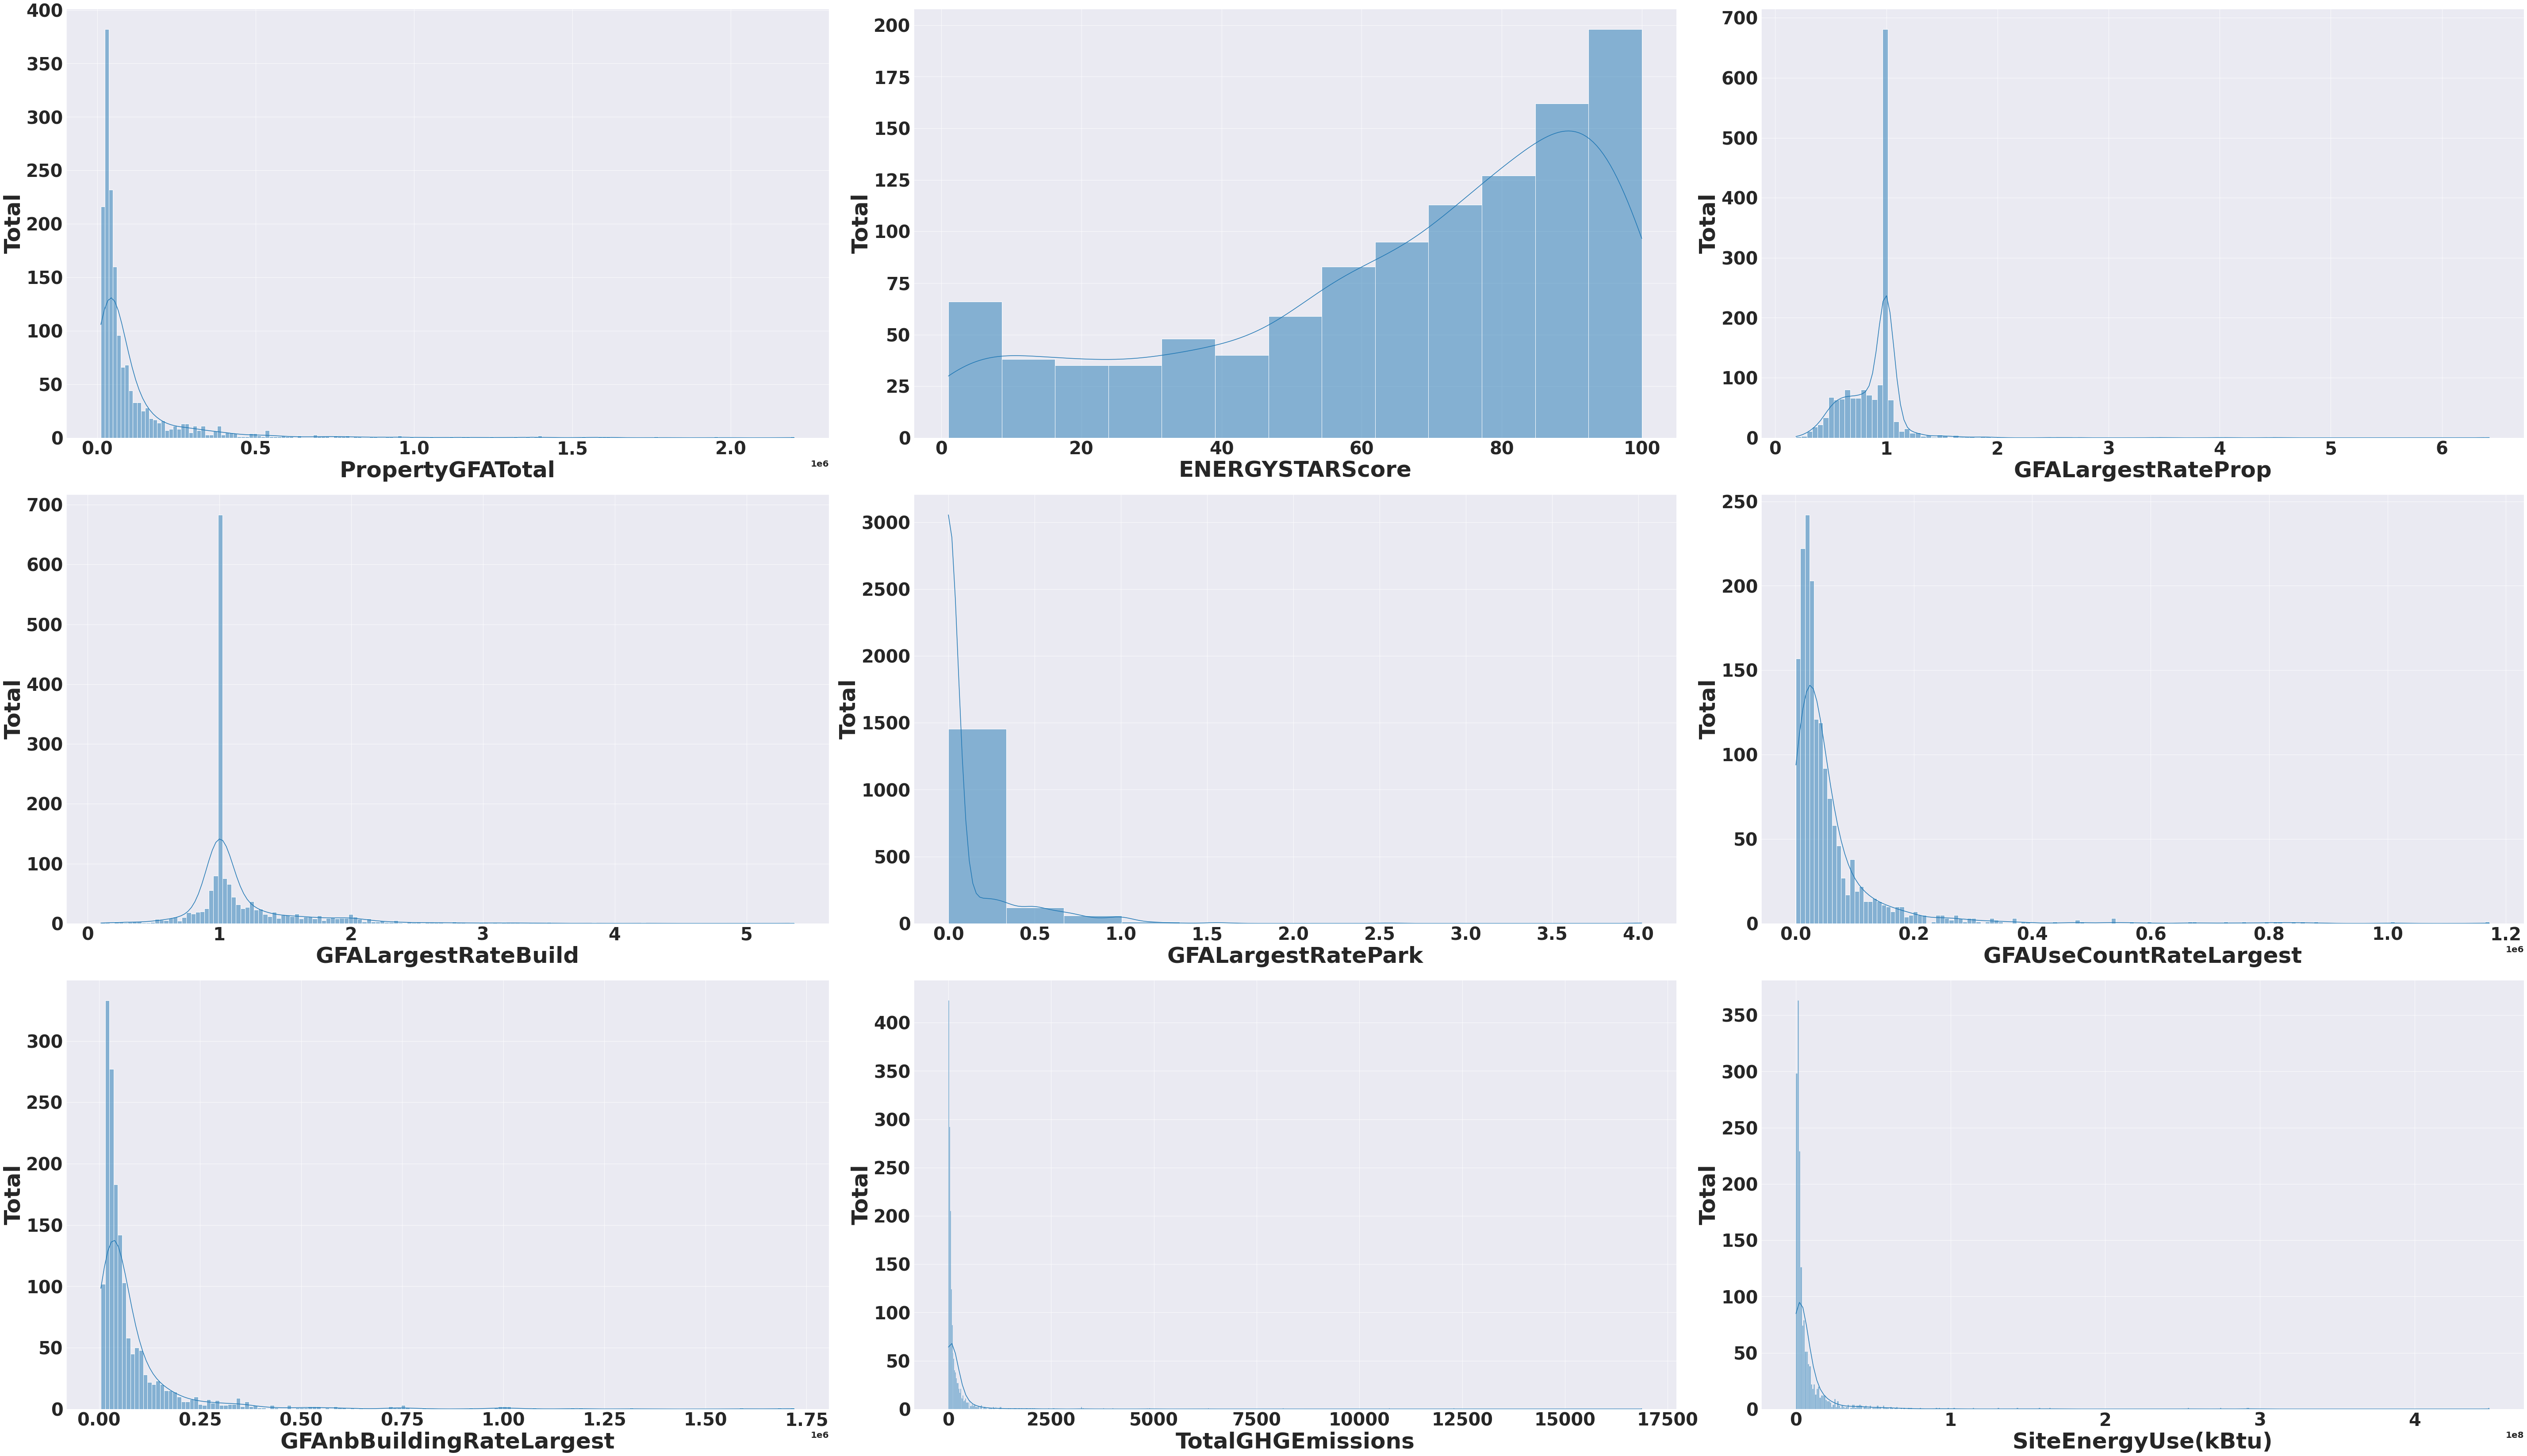

In [83]:
def distrib_emp(df,col_list):
    sns.set_style("darkgrid")
    fig = plt.figure(figsize=(80,60))
    with plt.rc_context({"font.weight": "bold"}):
        sub = 0
        for i in range(len(col_list)):
            fig.add_subplot(4,3,i+1)
            fig.tight_layout() 

            colonne = col_list[i]
            ax = sns.histplot(df[colonne], kde=True)
            ax.plot(label='big', fontsize=50, weight='bold')
            ax.set_xlabel(colonne, fontsize=50, weight='bold')
            ax.set_ylabel("Total", fontsize=50, weight='bold')
            ax.tick_params(axis='both', labelsize=40)
            sub += 1
        plt.show()
    
distrib_emp(df,var_numer+var_target)

In [84]:
df[var_numer + var_target].skew(axis = 0)

PropertyGFATotal             5.042853
ENERGYSTARScore             -0.786265
GFALargestRateProp           5.990530
GFALargestRateBuild          2.716605
GFALargestRatePark           4.755031
GFAUseCountRateLargest       5.412252
GFAnbBuildingRateLargest     5.422997
TotalGHGEmissions           14.637467
SiteEnergyUse(kBtu)         10.668909
dtype: float64

On peut voir que les distributions des variables sont très asymétriques, surtout celles des variables cibles avec un *skewness* de l'ordre de 10. Dans le prochain notebook, nous verrons qu'une transformation logarithmique nous donnera une distribution plus symétrique.

# <font color="#00afe6" id=section_4_2> 4.2 Analyses bivariées.</font>

In [85]:
var_usage = ['LargestPropertyUseType',
             'PrimaryPropertyType',
             'NewPropertyUseTypes'
              ]

In [86]:
def visualisation_boxplot(variable,target,df):
    the_mean=df[target].mean()
    fig=plt.figure(figsize=[18,7])
    fig.patch.set_facecolor('#E0E0E0')
    fig.patch.set_alpha(0.7)
    sns.boxplot(x=variable, 
                y=target, 
                data=df,
                color="#cbd1db",
                width=0.5,
                linewidth=3,
                showfliers=False,
                showmeans=True)
    plt.hlines(y=the_mean,
               xmin=-0.5,
               xmax=len(df[variable].unique())-0.5,
               color="#6d788b",
               ls="--",
               linewidth=3,
               label="Global mean")

    plt.ylabel(target, fontdict=font_style)
    plt.xlabel(variable, fontdict=font_style)
    plt.xticks(range(0,len(df[variable].unique()))
               ,df[variable].unique(),rotation=90)
    plt.legend()
    plt.grid()
    plt.show()

Ci-dessous sont représentés les diagrammes en boxplot des moyennes des variables cibles, en fonction des modalités (les types d'usages) des variables catégorielles. Pour les variables `PrimaryPropertyType` et `LargestPropertyUseType`, il y a des modalités qui se distinguent clairement des autres avec des moyennes élevées. Pour la nouvelle variable `NewPropertyUseTypes` toutes ses modalités ont des moyennes différentes les unes des autres.
Il est légitime de s'attendre à ce que ces dernières aient une influence sur la valeur prédite des deux variables cibles.

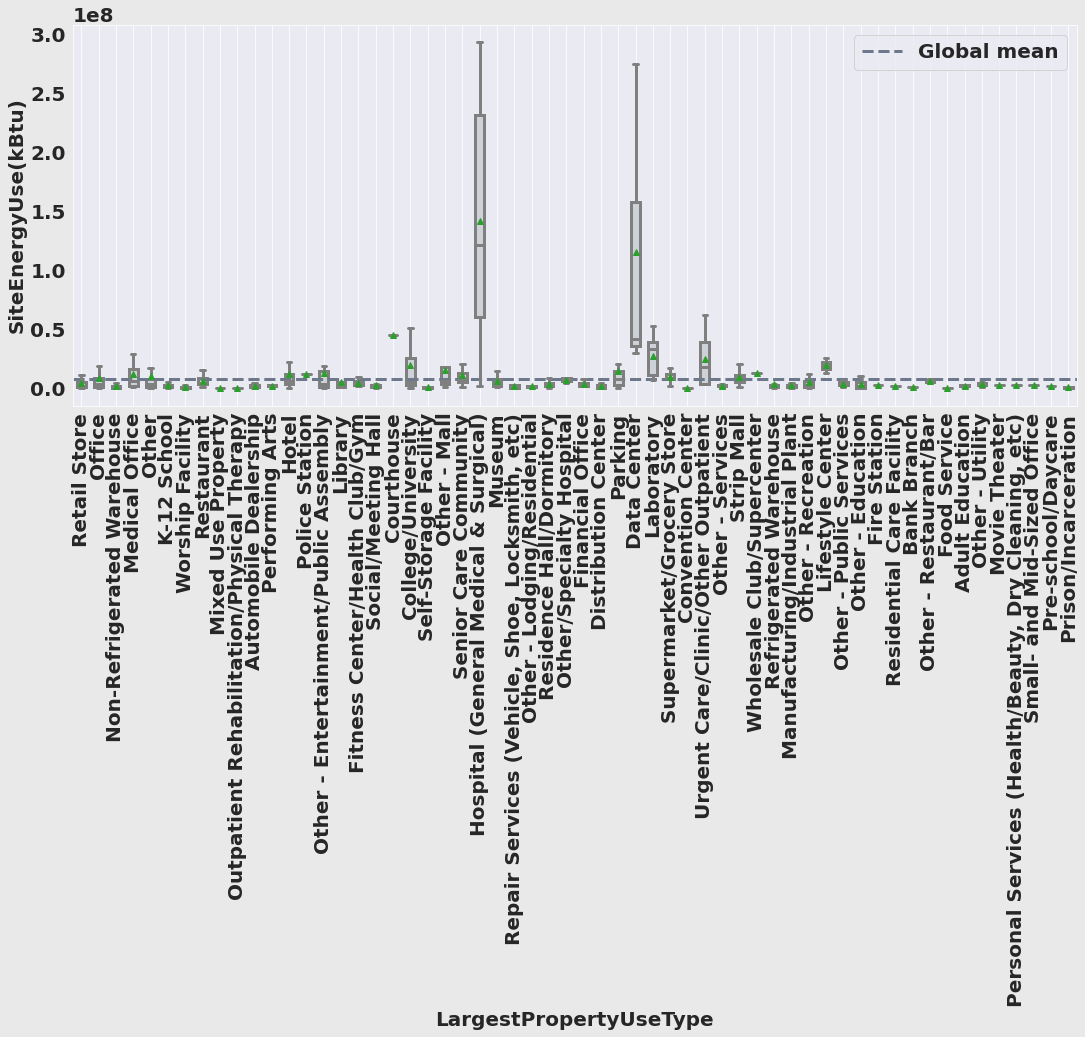

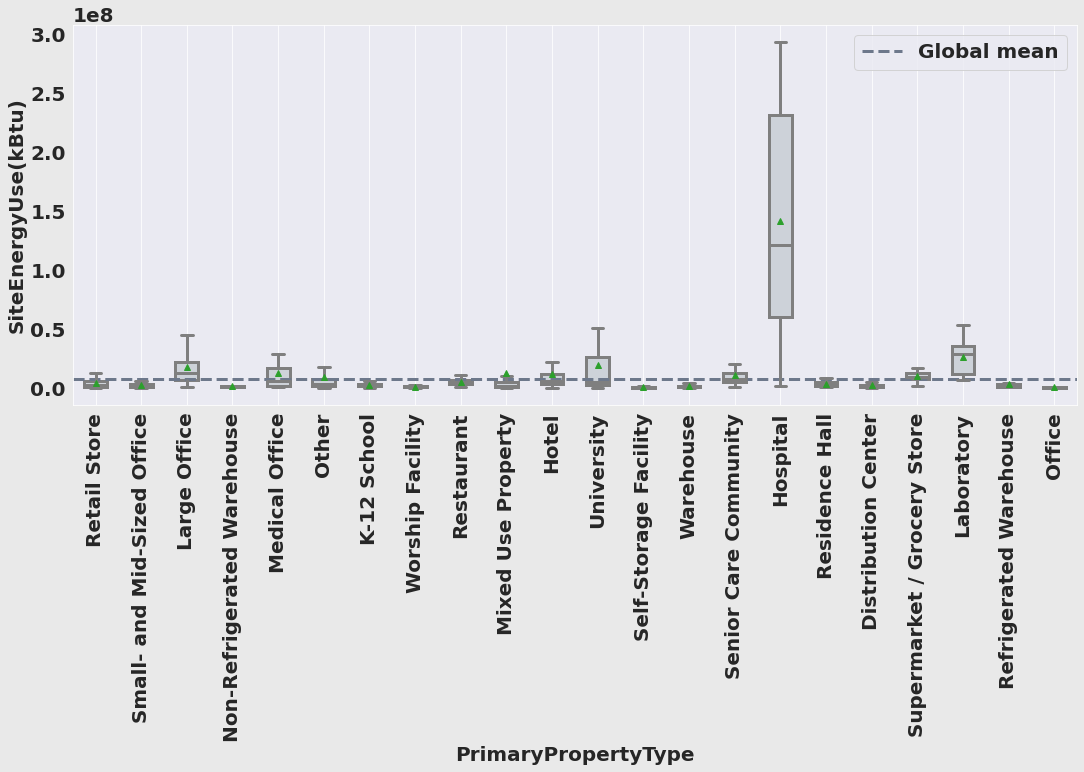

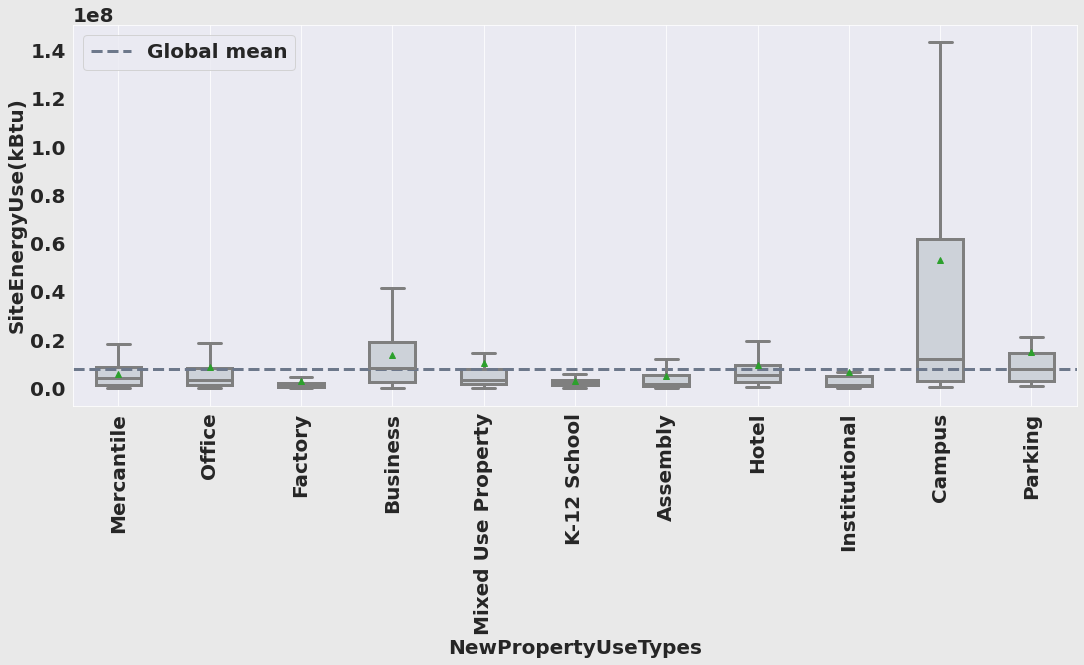

In [87]:
bivariate_columns = var_usage

for column in bivariate_columns:
    visualisation_boxplot(column,"SiteEnergyUse(kBtu)",df)

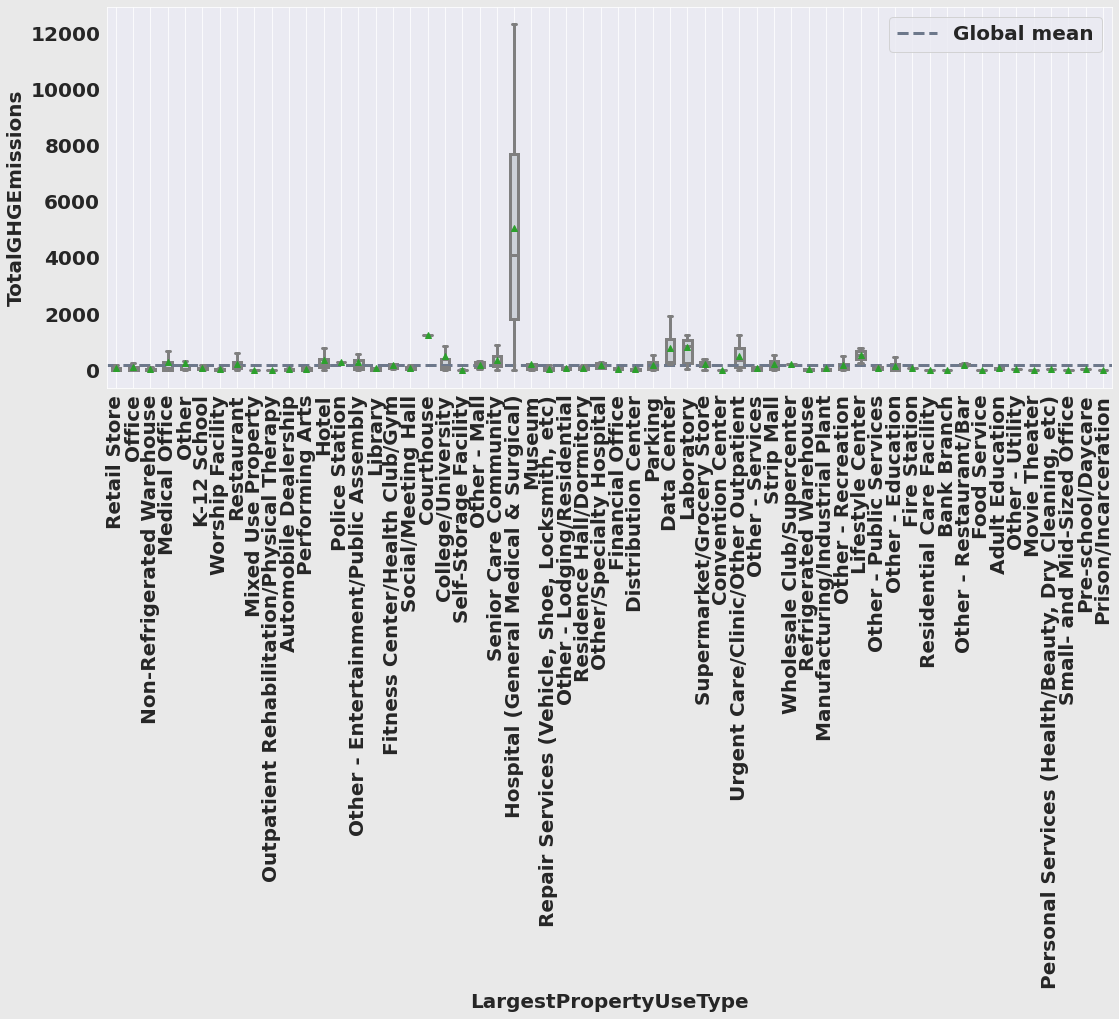

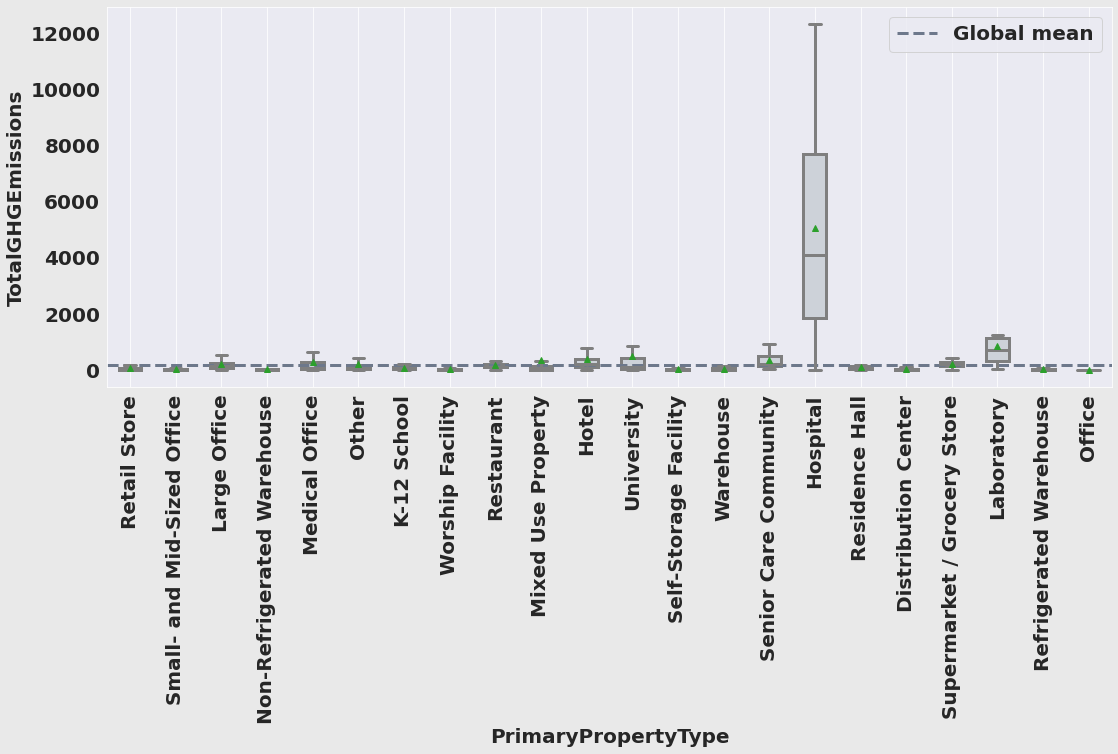

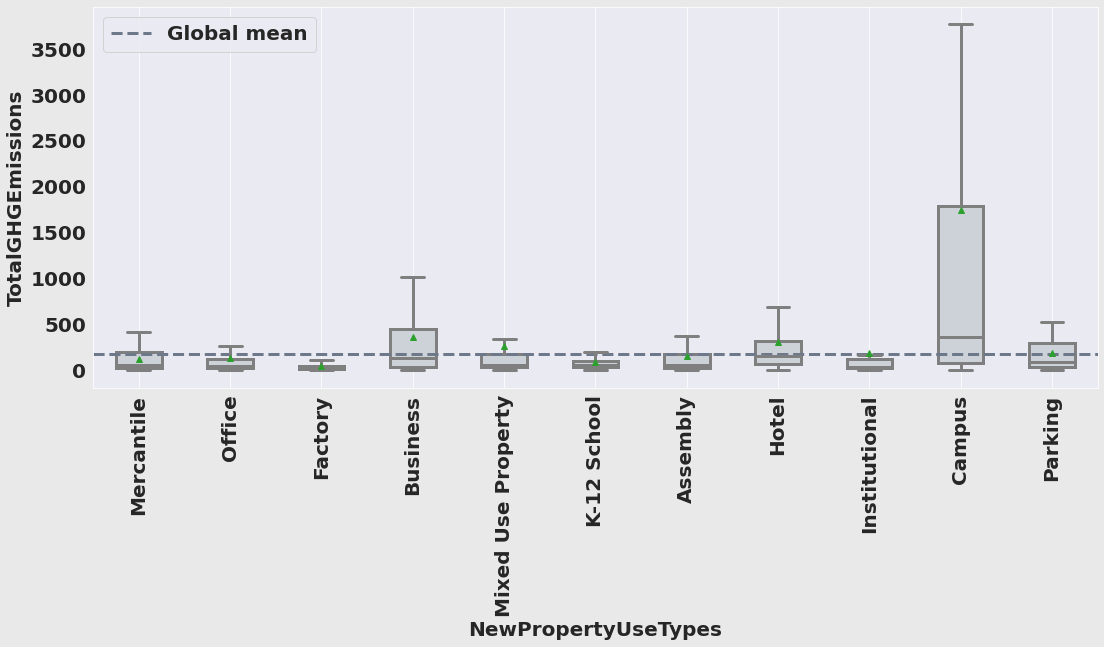

In [88]:
bivariate_columns = var_usage

for column in bivariate_columns:
    visualisation_boxplot(column,"TotalGHGEmissions",df)

Ci-dessous, les moyennes des variables cibles selon les modalités des positions géographiques clustérisées. Les moyennes sont également sensiblement différentes les unes des autres.

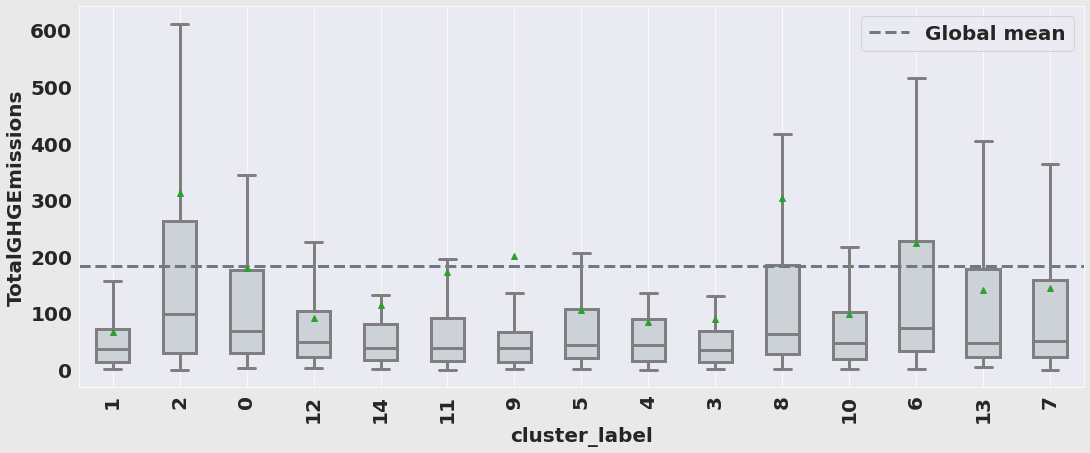

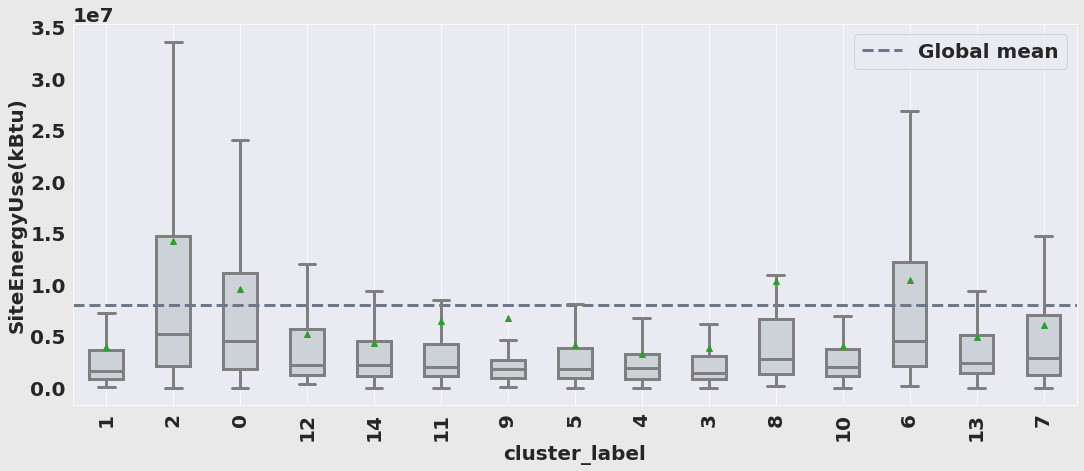

In [89]:
visualisation_boxplot('cluster_label',"TotalGHGEmissions",df)
visualisation_boxplot('cluster_label',"SiteEnergyUse(kBtu)",df)

Les barplots ci-dessous montrent que les bâtiments les plus récents sont les plus grands consommateurs et émetteurs.

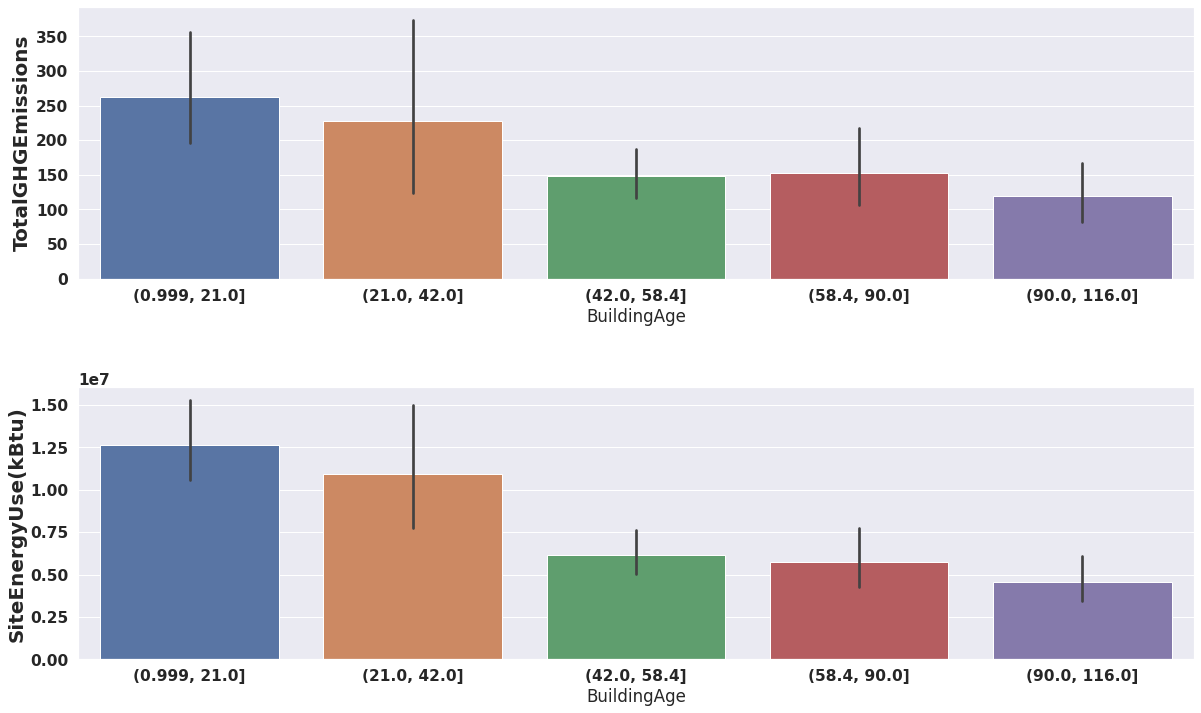

In [100]:
BAge_bins = pd.qcut(df['BuildingAge'], q=5)

fig, axes = plt.subplots(nrows=2, ncols=1, 
                         figsize=(20,12), 
                         gridspec_kw={'hspace': 0.4, 'wspace': 0.4})

sns.barplot(x = BAge_bins, 
            y = "TotalGHGEmissions", 
            data=df, 
             ax=axes[0])
axes[0].set_ylabel('TotalGHGEmissions',fontdict=font_style)

sns.barplot(x = BAge_bins, 
            y = "SiteEnergyUse(kBtu)", 
            data=df, 
             ax=axes[1])
axes[1].set_ylabel('SiteEnergyUse(kBtu)',fontdict=font_style)
plt.show()

# <font color="#00afe6" id=section_4_3>4.3 Matrice des corrélations. </font>

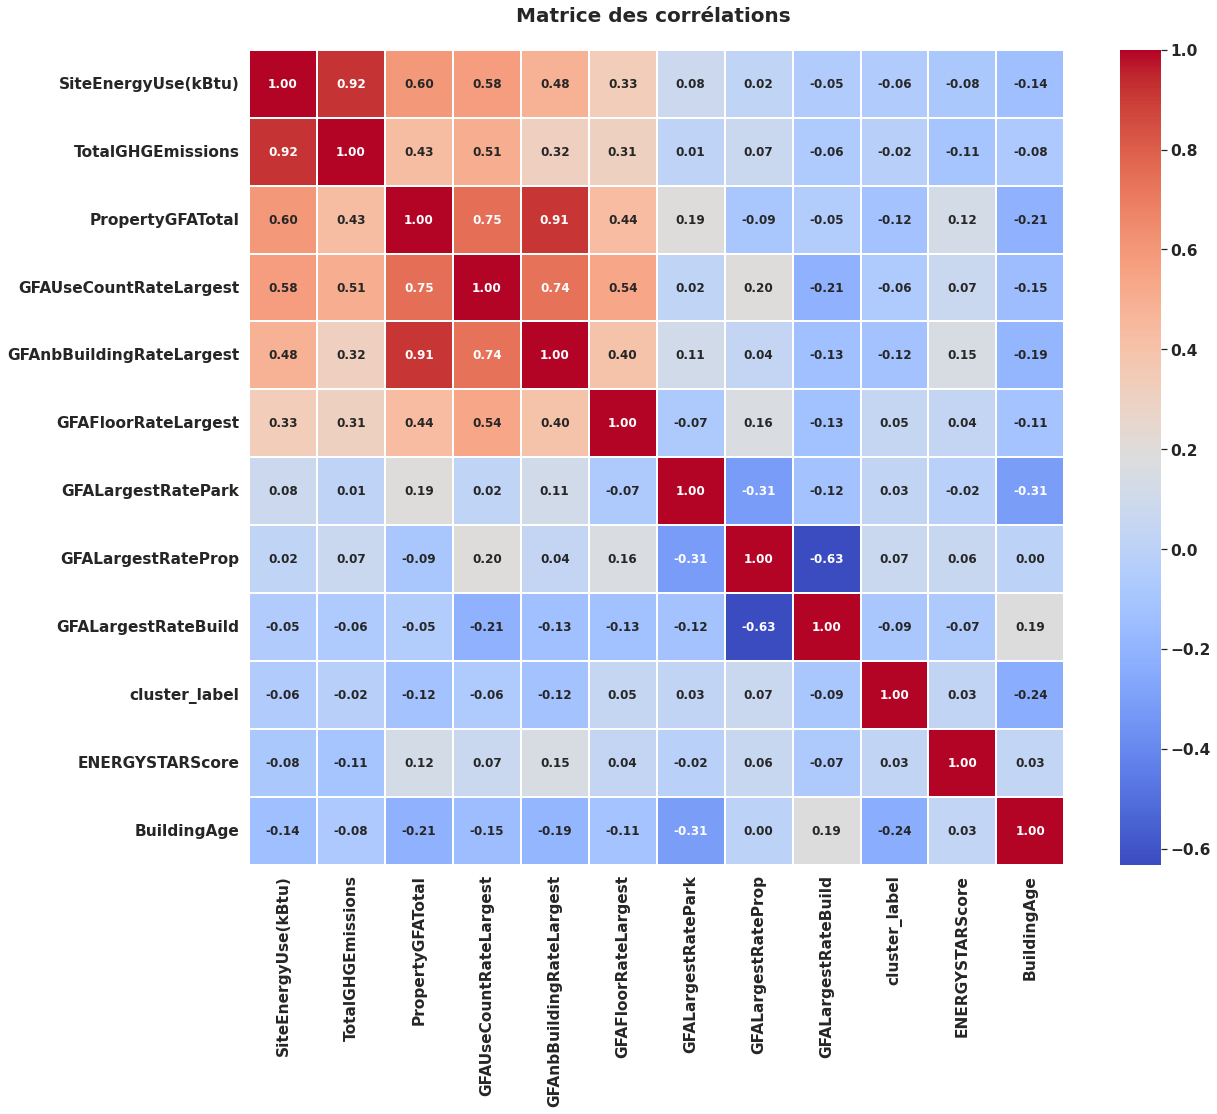

In [91]:
chx = 1
corr_mat = df.drop('OSEBuildingID', axis=1).corr(method='pearson')

idx_NS = corr_mat.nlargest(corr_mat.shape[1],var_target[chx])[var_target[chx]].index
corr_NS = corr_mat.loc[idx_NS, idx_NS]

fig = plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)

sns.heatmap(corr_NS, 
            cbar=True, 
            annot=True,
            fmt='.2f', 
            annot_kws={'size': 12},
            square=True, 
            linewidths=0.01, 
            cmap='coolwarm')
plt.title("Matrice des corrélations \n", fontdict=font_style)
plt.show()

Regardons les paires de variables fortement corrélées **(r>0.7)** mises en évidence par la matrice de corrélations ci-dessus.

In [92]:
threshold = 0.7

corr_pairs  = corr_mat.unstack().sort_values(kind="quicksort")

strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])\
                           .reset_index()\
                           .rename(columns={0:'corr_coeff'}))

strong_corr = strong_corr[(strong_corr.index%2 == 0) & 
                          (strong_corr['level_0'] != strong_corr['level_1'])]

strong_corr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
6,TotalGHGEmissions,SiteEnergyUse(kBtu),0.918325
4,GFAnbBuildingRateLargest,PropertyGFATotal,0.913635
2,PropertyGFATotal,GFAUseCountRateLargest,0.750009
0,GFAnbBuildingRateLargest,GFAUseCountRateLargest,0.736367


Bien que fortement corrélées, on ne considère pas la corrélation entre `GFAnbBuildingRateLargest` et `PropertyGFATotal` comme source de colinéarité dans notre modèle prédictif car ces deux variables ne mesurent pas une même information. En effet, la première fait partie des variables décrivant le comportement des principaux usagers tandis que la seconde représente la surface totale des bâtiments. Idem, avec la variable `GFAUseCountRateLargest`.

In [93]:
print("Pour finir, le jeu de données compte {} lignes et {} colonnes."\
       .format(df.shape[0], df.shape[1]))

Pour finir, le jeu de données compte 1650 lignes et 16 colonnes.


In [94]:
df.to_csv("datas_cleaned_final.csv")

In [95]:
df

,OSEBuildingID,PrimaryPropertyType,PropertyGFATotal,LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,BuildingAge,NewPropertyUseTypes,cluster_label,GFALargestRateProp,GFALargestRateBuild,GFALargestRatePark,GFAUseCountRateLargest,GFAnbBuildingRateLargest,GFAFloorRateLargest
0,325,Retail Store,111077.0,Retail Store,91.0,9.898724e+06,69.01,26,Mercantile,1,1.000000,1.000000,0.000000,111077.000000,111077.0,27769.25
1,400,Small- and Mid-Sized Office,98370.0,Office,45.0,6.525887e+06,47.24,109,Office,1,1.000000,0.736505,0.263495,98370.000000,98370.0,16395.00
2,442,Large Office,193788.0,Office,59.0,1.676022e+07,116.84,68,Office,2,0.715586,1.124481,0.272975,27734.400000,138672.0,34668.00
3,499,Small- and Mid-Sized Office,76598.0,Office,76.0,4.476997e+06,134.69,7,Office,0,0.720489,1.000000,0.387947,27594.000000,55188.0,18396.00
4,559,Large Office,186971.0,Office,86.0,1.266246e+07,226.92,34,Office,12,1.000032,0.999968,0.000000,93488.500000,186977.0,46744.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,50222,Office,12294.0,Office,46.0,8.497457e+05,20.94,26,Office,0,1.000000,1.000000,0.000000,12294.000000,12294.0,12294.00
1654,50223,Other,16000.0,Other - Recreation,NaN,9.502762e+05,32.17,12,Assembly,1,1.000000,1.000000,0.000000,16000.000000,16000.0,16000.00
1655,50224,Other,13157.0,Other - Recreation,NaN,5.765898e+06,223.54,42,Assembly,4,0.576347,1.735065,0.000000,2527.666667,7583.0,7583.00
1656,50225,Mixed Use Property,14101.0,Other - Recreation,NaN,7.194712e+05,22.11,27,Assembly,6,0.468123,2.136191,0.000000,1320.200000,6601.0,6601.00


Dans ce notebook, nous avons fusionné les deux jeux de données originaux des années 2015 et 2016. Après avoir nettoyé le dataframe obtenu en résultat, nous avons défini de nouvelles variables qui nous paraissent pertinentes pour la modélisation des variables d'intérêt, à savoir les consommations en électricité et émissions en CO2 des des bâtiments.   


Dans un second notebook, nous utiliserons ces nouvelles variables dans un modèle d'apprentissage qui nous permettra de prédire les variables cibles pour de futurs bâtiments n'ayant pas encore de relevés de consommation. Nous évaluerons également l'apport de l'**ESS** dans cette modélisation.